# Covid 19 forecasting. 

In this notebook my goal was to predict the number of fatalities and confirmed cases in some countries of covid 19. 

I use several databases for analysis of the covid data. The exploratory analysis can be found in the notebook call Dataxploration.

The database has information related about the conditions of the countries and the fatalities and confirmed cases. 

In this notebook, I probed different models to solve the task of forecasting the number of confirmed cases and fatalities of COVID 19. 



Go to the ****2)  and ****3) to see the Final Results 

In [1]:
!wget -nc https://www.dropbox.com/s/s43ocxw83h95pdg/interezants.zip?dl=0


--2020-06-09 02:25:43--  https://www.dropbox.com/s/s43ocxw83h95pdg/interezants.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s43ocxw83h95pdg/interezants.zip [following]
--2020-06-09 02:25:44--  https://www.dropbox.com/s/raw/s43ocxw83h95pdg/interezants.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5c945a56676a40e97677091841.dl.dropboxusercontent.com/cd/0/inline/A5RhwF8iiIX9TGGsb1pM0hN9o7lb1-gncpFt9wevmFTEqfpxfNeHVV3dNRtb-F6o79jOzLTHGAnOwT3mEeuQtHgfR9DpydNMCVDUeJdNYKavG01ZwKg6Gvtutq1_PrDREZc/file# [following]
--2020-06-09 02:25:44--  https://uc5c945a56676a40e97677091841.dl.dropboxusercontent.com/cd/0/inline/A5RhwF8iiIX9TGGsb1pM0hN9o7lb1-gncpFt9wevmFTEqfpxfNeHVV3dNRtb-F6o79jOzLTHGAnOwT3mEeuQtHgfR9DpydNMCVDU

In [3]:
!unzip interezants.zip?dl=0

Archive:  interezants.zip?dl=0
  inflating: interezants/.DS_Store   
  inflating: interezants/dfallvariables.csv  
  inflating: interezants/datak.csv   
  inflating: interezants/worldbank.csv  
  inflating: interezants/coronavirus-disease-covid-19-statistics-and-research (1).csv  
  inflating: interezants/total-covid-19-tests-performed-by-country.csv  
  inflating: interezants/covid19-global-forecasting-week-5/MyaproachRNN.ipynb  
  inflating: interezants/covid19-global-forecasting-week-5/Italy  
  inflating: interezants/covid19-global-forecasting-week-5/best_model.h5  
  inflating: interezants/covid19-global-forecasting-week-5/Portugal  
  inflating: interezants/covid19-global-forecasting-week-5/Ireland  
  inflating: interezants/covid19-global-forecasting-week-5/Israel  
  inflating: interezants/covid19-global-forecasting-week-5/Denmark  
  inflating: interezants/covid19-global-forecasting-week-5/Japan  
  inflating: interezants/covid19-global-forecasting-week-5/India  
  inflating: 

In [4]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

replicating local resources


In [5]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
    %load_ext tensorboard
import tensorflow as tf
tf.__version__

setting tensorflow version in colab


'2.2.0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, RepeatVector, TimeDistributed, LSTM

from tensorflow import keras
from local.lib import DataPreparationRNN

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
import math
from sklearn.metrics import mean_squared_error

In [8]:
from math import sqrt 
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from local.lib import DataPreparationRNN
from sklearn.metrics import mean_squared_log_error

Using TensorFlow backend.


# Load data:

In [9]:
pwd

'/content'

In [11]:
ls

 init.py       'interezants.zip?dl=0'   __pycache__/
 interezants/   local/                  sample_data/


In [12]:

%cd interezants/covid19-global-forecasting-week-5


/content/interezants/covid19-global-forecasting-week-5


In [19]:
train_df = pd.read_csv("traindf.csv")
train_df=train_df.drop(['geometry'], axis=1)
train_df

,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
0,NaN,Afghanistan,27657145,0.583587,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
1,NaN,Afghanistan,27657145,0.583587,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2,NaN,Afghanistan,27657145,0.583587,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
3,NaN,Afghanistan,27657145,0.583587,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
4,NaN,Afghanistan,27657145,0.583587,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440207,NaN,Zimbabwe,14240168,0.607106,2020-05-28,0.0,17.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440208,NaN,Zimbabwe,14240168,0.607106,2020-05-29,0.0,0.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440209,NaN,Zimbabwe,14240168,0.607106,2020-05-30,0.0,25.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440210,NaN,Zimbabwe,14240168,0.607106,2020-05-31,0.0,4.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
train_df['Fatalities']=train_df['Fatalities'].abs()
train_df['ConfirmedCases']=train_df['ConfirmedCases'].abs()


In [21]:
train_df.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,4.402120e+05,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000
mean,1.692434e+06,0.973997,1.312527,20.985257,0.002192,0.002578,0.002378,0.196860,0.181285,0.222272,0.003807,0.404145
std,2.506873e+07,0.168266,28.982528,397.700216,0.046769,0.050712,0.048711,0.031579,0.026555,0.047106,0.005790,0.065734
min,8.600000e+01,0.476600,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.068866,0.000068,0.000076,0.000000
25%,1.188000e+04,0.874544,0.000000,0.000000,0.000000,0.000000,0.000000,0.195652,0.180347,0.232227,0.003607,0.416330
50%,2.881500e+04,0.973834,0.000000,0.000000,0.000000,0.000000,0.000000,0.195652,0.180347,0.232227,0.003607,0.416330
75%,9.245900e+04,1.065792,0.000000,0.000000,0.000000,0.000000,0.000000,0.195652,0.180347,0.232227,0.003607,0.416330
max,1.295210e+09,2.239186,4591.000000,36163.000000,1.000000,1.000000,1.000000,0.971014,1.000000,0.958787,0.317348,1.000000


In [0]:
train_df=train_df[train_df.Country_Region.isin(['Indonesia', 'Brazil', 'Pakistan', 'United States','India','Mexico', 'Bangladesh', 'France', 'South Africa', 'Italy', 'Germany', 'Turkey', 'Vietnam', 'Japan', 'Philippines', 'Thailand', 'United Kingdom','New Zealand', 'Bulgaria', 'Qatar', 'Ireland', 'Colombia', 'Costa Rica', 'Netherlands', 'Switzerland', 'Saudi Arabia', 'El Salvador', 'Zimbabwe', 'Belgium', 'Slovakia', 'Sweden', 'Luxembourg', 'Argentina', 'Singapore', 'Slovenia', 'Australia', 'Uganda', 'Panama', 'Chile', 'Austria', 'Greece', 'Israel', 'Belarus', 'Nepal', 'Estonia', 'Malaysia', 'Poland', 'Canada', 'Denmark', 'Finland', 'Norway', 'Ecuador', 'Croatia', 'Uruguay', 'Ghana', 'Portugal', 'Romania', 'Paraguay', 'Hungary', 'Spain', 'Kazakhstan', 'Bahrain', 'Kenya'])]

Using Previous cluster found in dataxploratory

In [0]:
train_df0=train_df[train_df.Country_Region.isin(['Indonesia', 'Brazil', 'Pakistan', 'United States','India'])]
train_df1=train_df[train_df.Country_Region.isin(['Mexico', 'Bangladesh', 'France', 'South Africa', 'Italy', 'Germany', 'Turkey', 'Vietnam', 'Japan', 'Philippines', 'Thailand', 'United Kingdom'])]
train_df2=train_df[train_df.Country_Region.isin(['New Zealand', 'Bulgaria', 'Qatar', 'Ireland', 'Colombia', 'Costa Rica', 'Netherlands', 'Switzerland', 'Saudi Arabia', 'El Salvador', 'Zimbabwe', 'Belgium', 'Slovakia', 'Sweden', 'Luxembourg', 'Argentina', 'Singapore', 'Slovenia', 'Australia', 'Uganda', 'Panama', 'Chile', 'Austria', 'Greece', 'Israel', 'Belarus', 'Nepal', 'Estonia', 'Malaysia', 'Poland', 'Canada', 'Denmark', 'Finland', 'Norway', 'Ecuador', 'Croatia', 'Uruguay', 'Ghana', 'Portugal', 'Romania', 'Paraguay', 'Hungary', 'Spain', 'Kazakhstan', 'Bahrain', 'Kenya'])]

In [18]:
import plotly.express as px
fig = px.bar(train_df0.loc[(train_df0['Country_Region'] == 'Brazil') &(train_df0.Date >= '2020-02-01')].sort_values('Fatalities',ascending = False), 
             x='Date', y='Fatalities', color='Fatalities', color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Death COVID-19 cases per day in Brazil')
fig.show()

In [0]:
import plotly.express as px
fig = px.bar(train_df0.loc[(train_df0['Country_Region'] == 'Brazil') &(train_df0.Date >= '2020-02-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='Fatalities', color='Fatalities', color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Death COVID-19 cases per day in Brazil')
fig.show()

In [0]:
train_df0.loc[(train_df0['Country_Region'] == 'Brazil') &(train_df0.Date >= '2020-02-01')].sort_values('ConfirmedCases',ascending = False).iloc[:,5:]

,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
3272,956.0,33274.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3271,1124.0,26928.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3270,1156.0,26417.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3264,1001.0,20803.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3269,1086.0,20599.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
...,...,...,...,...,...,...,...,...,...,...
3184,0.0,0.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3188,0.0,0.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3195,0.0,0.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3154,0.0,0.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166


## 1 Atempt. RNN per countrie 

Firts im  going to make a rnn using only the db per countrie, for this im goin to sort by date only by using two variables, confirmed cases and deaths 

In [0]:
dataset=train_df0[train_df0['Country_Region'] == 'Brazil']


In [0]:
dataset

,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
3144,NaN,Brazil,206135893,0.522356,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3145,NaN,Brazil,206135893,0.522356,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3146,NaN,Brazil,206135893,0.522356,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3147,NaN,Brazil,206135893,0.522356,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3148,NaN,Brazil,206135893,0.522356,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,NaN,Brazil,206135893,0.522356,2020-05-28,1156.0,26417.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3271,NaN,Brazil,206135893,0.522356,2020-05-29,1124.0,26928.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3272,NaN,Brazil,206135893,0.522356,2020-05-30,956.0,33274.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166
3273,NaN,Brazil,206135893,0.522356,2020-05-31,480.0,16409.0,0.0,0.0,0.0,0.15942,0.232499,0.14768,0.000949,0.140166


In [0]:
dataset.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,131.0,1.310000e+02,131.000000,131.000000,131.0,131.0,131.0,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02
mean,206135893.0,5.223556e-01,228.526718,4018.679389,0.0,0.0,0.0,1.594203e-01,2.324991e-01,1.476801e-01,9.492349e-04,1.401660e-01
std,0.0,7.801395e-16,337.992156,6624.761280,0.0,0.0,0.0,2.507591e-16,6.408288e-16,2.786212e-17,3.265093e-19,1.114485e-16
min,206135893.0,5.223556e-01,0.000000,0.000000,0.0,0.0,0.0,1.594203e-01,2.324991e-01,1.476801e-01,9.492349e-04,1.401660e-01
25%,206135893.0,5.223556e-01,0.000000,0.000000,0.0,0.0,0.0,1.594203e-01,2.324991e-01,1.476801e-01,9.492349e-04,1.401660e-01
50%,206135893.0,5.223556e-01,19.000000,432.000000,0.0,0.0,0.0,1.594203e-01,2.324991e-01,1.476801e-01,9.492349e-04,1.401660e-01
75%,206135893.0,5.223556e-01,389.500000,5148.000000,0.0,0.0,0.0,1.594203e-01,2.324991e-01,1.476801e-01,9.492349e-04,1.401660e-01
max,206135893.0,5.223556e-01,1188.000000,33274.000000,0.0,0.0,0.0,1.594203e-01,2.324991e-01,1.476801e-01,9.492349e-04,1.401660e-01


In [0]:

values=train_df0[['Date','ConfirmedCases', 'Fatalities']]

In [0]:
values=values.set_index('Date')
values

,ConfirmedCases,Fatalities
Date,,
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
...,...,...
2020-05-28,2076.0,35.0
2020-05-29,2801.0,57.0
2020-05-30,2429.0,78.0


In [0]:
i=0

In [0]:
def create_mult_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(dataset.shape[0]-look_back):
        a = dataset[i:(i+look_back),:]
        dataX.append(a)
        dataY.append(dataset[i + look_back][0])
    return np.array(dataX), np.array(dataY)

In [0]:
dataset=values
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
from sklearn.preprocessing import MinMaxScaler
i=1
j=1
look_back=1
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = create_mult_dataset(trainN, look_back)
X_test, y_test = create_mult_dataset(testN, look_back)

In [0]:
X_train.shape

(350, 1, 2)

In [0]:
modelg=Generalmodel(j,i,1)
model=modelg.define_model()
print (i,j)
#def EstimaRMSE_RNN(model,X_train,X_test,y_train,y_test,scaler,look_back,n_steps):
trainPredict = model.predict(X_train)#.reshape(X_train.shape[0],n_steps,look_back))
testPredict = model.predict(X_test)#.reshape(X_test.shape[0],n_steps,look_back))
# invert predictions
test_X=X_test
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 0][:,1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = y_test.reshape((len(y_test), 1))
inv_y = concatenate((test_y, test_X[:,  0][:,1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

#rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
rmse = sqrt(mean_squared_log_error(abs(inv_y), abs(inv_yhat)))
print('Test RMSE: %.3f' % rmse)

In [0]:
inv_y[3]

In [0]:
class Generalmodel:
  def __init__(self, mo, look_back,flag): ##Flag is for choose polution in train or not
         
         self.modell = mo
         self.look_back = look_back
         self.flag=flag
         #self.neurons = neurons
  def define_model(self):
    print("look",self.look_back)
    model = Sequential()
    #print(look_back)
    neurons=10
    inputt=2
   # model.summary()
    if self.flag==1:
      if self.modell==0:
        print("rnn")
        model.add(SimpleRNN(neurons,activation = 'relu',input_shape=(self.look_back,inputt)))
        
      elif self.modell==1:
        model.add(GRU(neurons,activation = 'relu',input_shape=(self.look_back,inputt)))
        print("gru")
      elif self.modell==2:
        model.add(LSTM(neurons,activation = 'relu',input_shape=(self.look_back,inputt)))
        print("lstm")
      model.add(Dense(1))
    
      model.compile(optimizer='adam',loss='mse')
      model.fit(X_train,y_train.flatten(),epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
    else: 
      
      if self.modell==0:
        print("rnn")
        model.add(SimpleRNN(neurons,activation = 'relu',input_shape=(self.look_back,6)))
        
      elif self.modell==1:
        model.add(GRU(neurons,activation = 'relu',input_shape=(self.look_back,6)))
        print("gru")
      elif self.modell==2:
        model.add(LSTM(neurons,activation = 'relu',input_shape=(self.look_back,6)))
        print("lstm")
      model.add(Dense(1))
      
      model.compile(optimizer='adam',loss='mse')
      model.fit(X_train[:, :,1:],y_train.flatten(),epochs=50, batch_size=72, validation_data=(X_test[:, :,1:], y_test), verbose=2, shuffle=False)

    return model

In [0]:
from sklearn.metrics import mean_squared_log_error

models = [0,1,2]
look_back = range(1,5)
s = (5,3)
ms=np.zeros(s)
for i in look_back:

  train_size = int(len(dataset) * 0.67)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
  from sklearn.preprocessing import MinMaxScaler

  
  scaler = MinMaxScaler(feature_range=(0, 1))
  trainN = scaler.fit_transform(train)
  testN = scaler.transform(test)
  X_train, y_train = create_mult_dataset(trainN, i)
  X_test, y_test = create_mult_dataset(testN, i)
  for j in models:

    dataset=values

    #del model
    modelg=Generalmodel(j,i,1)
    model=modelg.define_model()
    print (i,j)
    #def EstimaRMSE_RNN(model,X_train,X_test,y_train,y_test,scaler,look_back,n_steps):
    trainPredict = model.predict(X_train)#.reshape(X_train.shape[0],n_steps,look_back))
    testPredict = model.predict(X_test )#.reshape(X_test.shape[0],n_steps,look_back))
    # invert predictions
    test_X=X_test
    yhat = model.predict(test_X)
    #test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 0][:,1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = y_test.reshape((len(y_test), 1))
    inv_y = concatenate((test_y, test_X[:,  0][:,1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    
    #rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    rmse = sqrt(mean_squared_log_error(abs(inv_y), abs(inv_yhat)))
    print('Test RMSE: %.3f' % rmse)
    ms[i-1][j]=rmse

look 1
rnn
Train on 350 samples, validate on 172 samples
Epoch 1/100
 - 0s - loss: 0.0298 - val_loss: 9.0459e-04
Epoch 2/100
 - 0s - loss: 0.0278 - val_loss: 7.4040e-04
Epoch 3/100
 - 0s - loss: 0.0262 - val_loss: 6.4035e-04
Epoch 4/100
 - 0s - loss: 0.0247 - val_loss: 5.9302e-04
Epoch 5/100
 - 0s - loss: 0.0234 - val_loss: 5.8798e-04
Epoch 6/100
 - 0s - loss: 0.0222 - val_loss: 6.1762e-04
Epoch 7/100
 - 0s - loss: 0.0212 - val_loss: 6.7344e-04
Epoch 8/100
 - 0s - loss: 0.0203 - val_loss: 7.4963e-04
Epoch 9/100
 - 0s - loss: 0.0194 - val_loss: 8.3891e-04
Epoch 10/100
 - 0s - loss: 0.0186 - val_loss: 9.3474e-04
Epoch 11/100
 - 0s - loss: 0.0180 - val_loss: 0.0010
Epoch 12/100
 - 0s - loss: 0.0173 - val_loss: 0.0011
Epoch 13/100
 - 0s - loss: 0.0168 - val_loss: 0.0012
Epoch 14/100
 - 0s - loss: 0.0163 - val_loss: 0.0013
Epoch 15/100
 - 0s - loss: 0.0158 - val_loss: 0.0014
Epoch 16/100
 - 0s - loss: 0.0153 - val_loss: 0.0014
Epoch 17/100
 - 0s - loss: 0.0149 - val_loss: 0.0015
Epoch 18/10

In [0]:
ms

array([[3.53363149, 3.37691935, 3.75412519],
       [1.47204996, 2.8953712 , 1.96434688],
       [2.25164343, 2.24455648, 2.61863979],
       [1.98392407, 1.4498308 , 2.47717808],
       [0.        , 0.        , 0.        ]])

The performance is very low, now i going to use all the countries to train and see what happend with the performance, but for countrie, in this case Brazil

## 2 atempt RNN training with several countries 

In this case using different numbers as look fordward but onlypredicting one day ahead

In [0]:
dataset=train_df0


In [0]:
dataset

,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
3144,NaN,Brazil,206135893,0.522356,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3145,NaN,Brazil,206135893,0.522356,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3146,NaN,Brazil,206135893,0.522356,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3147,NaN,Brazil,206135893,0.522356,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3148,NaN,Brazil,206135893,0.522356,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,NaN,Pakistan,194125062,0.523999,2020-05-28,35.0,2076.0,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15585,NaN,Pakistan,194125062,0.523999,2020-05-29,57.0,2801.0,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15586,NaN,Pakistan,194125062,0.523999,2020-05-30,78.0,2429.0,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15587,NaN,Pakistan,194125062,0.523999,2020-05-31,88.0,3039.0,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357


In [0]:
dataset.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,5.240000e+02,524.000000,524.000000,524.000000,524.0,524.000000,524.0,524.000000,524.000000,524.000000,524.000000,524.000000
mean,4.885440e+08,0.509796,73.914122,1572.933206,0.0,0.135496,0.0,0.085145,0.460186,0.362493,0.008799,0.050627
std,4.668073e+08,0.019402,193.962658,3825.572039,0.0,0.342580,0.0,0.045981,0.236357,0.344982,0.006194,0.054555
min,1.941251e+08,0.476600,0.000000,0.000000,0.0,0.000000,0.0,0.043478,0.232499,0.147680,0.000949,0.005357
25%,2.031332e+08,0.506323,0.000000,0.000000,0.0,0.000000,0.0,0.048913,0.296093,0.152022,0.004537,0.007376
50%,2.324204e+08,0.519293,5.000000,142.000000,0.0,0.000000,0.0,0.068841,0.380075,0.171753,0.008315,0.028492
75%,5.178312e+08,0.522766,38.000000,1110.750000,0.0,0.000000,0.0,0.105072,0.544168,0.382224,0.012577,0.071743
max,1.295210e+09,0.523999,1188.000000,33274.000000,0.0,1.000000,0.0,0.159420,0.848092,0.958787,0.017618,0.140166


In [0]:
dataset.columns

Index(['Province_State', 'Country_Region', 'Population', 'Weight', 'Date',
       'Fatalities', 'ConfirmedCases', 'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+'],
      dtype='object')

in this case is usefull to work with the other variables

In [0]:

values=train_df0[['Fatalities', 'ConfirmedCases','Country_Region','Population', 'Weight', 'Date',
        'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
values

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,Date,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
3144,0.0,0.0,Brazil,206135893,0.522356,2020-01-23,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3145,0.0,0.0,Brazil,206135893,0.522356,2020-01-24,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3146,0.0,0.0,Brazil,206135893,0.522356,2020-01-25,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3147,0.0,0.0,Brazil,206135893,0.522356,2020-01-26,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3148,0.0,0.0,Brazil,206135893,0.522356,2020-01-27,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,35.0,2076.0,Pakistan,194125062,0.523999,2020-05-28,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15585,57.0,2801.0,Pakistan,194125062,0.523999,2020-05-29,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15586,78.0,2429.0,Pakistan,194125062,0.523999,2020-05-30,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15587,88.0,3039.0,Pakistan,194125062,0.523999,2020-05-31,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357


In [0]:
values=values.set_index('Date')
values

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-24,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-25,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-26,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-27,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,35.0,2076.0,Pakistan,194125062,0.523999,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
2020-05-29,57.0,2801.0,Pakistan,194125062,0.523999,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
2020-05-30,78.0,2429.0,Pakistan,194125062,0.523999,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357


In [0]:
list(values.Country_Region.unique())

['Brazil', 'India', 'Indonesia', 'Pakistan']

In [0]:
def create_mult_dataset_basedon_countrie(dataset, look_back=1):
    dataX, dataY = [], []
    for j in list(dataset.Country_Region.unique()):
        for i in range(dataset[dataset.Country_Region==j].shape[0]-look_back):
            
            datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
        'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
            
            a = datas.iloc[i:(i+look_back),:].values
            
            dataX.append(a)
            
            dataY.append(datas.iloc[i + look_back][0])
    return np.array(dataX), np.array(dataY)

In [0]:
y_train[341]

In [0]:
X_train[342]

In [0]:
trainN.iloc[340:347]

In [0]:
trainN

In [0]:
dataset=values

train_size = int(len(dataset[dataset['Country_Region']=='Brazil']) * 0.67)
maxdatetrain=dataset[dataset['Country_Region']=='Brazil'].iloc[train_size,:].name
train, test = dataset[dataset.index<maxdatetrain], dataset[dataset.index>maxdatetrain]

from sklearn.preprocessing import MinMaxScaler

look_back=1
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = pd.DataFrame(scaler.fit_transform(train.drop('Country_Region',axis=1)),columns=train.drop('Country_Region',axis=1).columns,index=train.index)
trainN['Country_Region']=list(train.iloc[:,2])
testN = pd.DataFrame(scaler.transform(test.drop('Country_Region',axis=1)),columns=train.drop('Country_Region',axis=1).columns,index=test.index)
testN['Country_Region']=list(test.iloc[:,2])
X_train, y_train = create_mult_dataset_basedon_countrie(trainN, look_back)
X_test, y_test = create_mult_dataset_basedon_countrie(testN, look_back)

In [0]:
y_train[-1]

In [0]:
X_train

In [0]:
y_train[0:5]

In [0]:
trainN.iloc[0 + 1][0]

In [0]:
trainN

In [0]:
testN.describe()

In [0]:
j=1
i=1
modelg=Generalmodel(j,i,1)
model=modelg.define_model()
print (i,j)
#def EstimaRMSE_RNN(model,X_train,X_test,y_train,y_test,scaler,look_back,n_steps):
trainPredict = model.predict(X_train)#.reshape(X_train.shape[0],n_steps,look_back))
testPredict = model.predict(X_test )#.reshape(X_test.shape[0],n_steps,look_back))
# invert predictions
test_X=X_test
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast


look 1
gru
Train on 344 samples, validate on 168 samples
Epoch 1/200
 - 0s - loss: 0.0281 - val_loss: 2.8354
Epoch 2/200
 - 0s - loss: 0.0241 - val_loss: 2.7733
Epoch 3/200
 - 0s - loss: 0.0217 - val_loss: 2.7191
Epoch 4/200
 - 0s - loss: 0.0204 - val_loss: 2.6745
Epoch 5/200
 - 0s - loss: 0.0197 - val_loss: 2.6400
Epoch 6/200
 - 0s - loss: 0.0194 - val_loss: 2.6154
Epoch 7/200
 - 0s - loss: 0.0192 - val_loss: 2.5985
Epoch 8/200
 - 0s - loss: 0.0189 - val_loss: 2.5821
Epoch 9/200
 - 0s - loss: 0.0186 - val_loss: 2.5640
Epoch 10/200
 - 0s - loss: 0.0184 - val_loss: 2.5427
Epoch 11/200
 - 0s - loss: 0.0182 - val_loss: 2.5179
Epoch 12/200
 - 0s - loss: 0.0180 - val_loss: 2.4897
Epoch 13/200
 - 0s - loss: 0.0178 - val_loss: 2.4581
Epoch 14/200
 - 0s - loss: 0.0176 - val_loss: 2.4246
Epoch 15/200
 - 0s - loss: 0.0174 - val_loss: 2.3883
Epoch 16/200
 - 0s - loss: 0.0172 - val_loss: 2.3504
Epoch 17/200
 - 0s - loss: 0.0169 - val_loss: 2.3109
Epoch 18/200
 - 0s - loss: 0.0166 - val_loss: 2.269

In [0]:
yhat[0]

In [0]:
y_test[0]

In [0]:
test_y[:-1]

In [0]:
test_X

In [0]:
test_X[1:,  0][:,1:].shape

In [0]:
concatenate((test_y[:-1], test_X[1:,  0][:,1:]), axis=1)

In [0]:
test_X.shape

In [0]:
y_test.shape

In [0]:
inv_yhat = concatenate((yhat[:-1], test_X[1:, 0][:,1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = y_test.reshape((len(y_test), 1))
inv_y = concatenate((test_y[:-1], test_X[1:,  0][:,1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [0]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
from sklearn.metrics import mean_squared_log_error
rmselog = sqrt(mean_squared_log_error(abs(inv_y), abs(inv_yhat)))
print('Test log RMSE: %.3f' % rmselog)

Test RMSE: 113.129
Test log RMSE: 0.641


In [0]:
rmse = sqrt(mean_squared_error(test_y[0
      :10], yhat[0:10]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.515


In [0]:
test_y[0
      :10]

In [0]:
yhat[0:10]

In [0]:
class Generalmodel:
  def __init__(self, mo, look_back,flag): ##Flag is for choose polution in train or not
         self.modell = mo
         self.look_back = look_back
         self.flag=flag
         #self.neurons = neurons
  def define_model(self):
    print("look",self.look_back)
    model = Sequential()
    #print(look_back)
    neurons=10
    inputt=12
   # model.summary()
    if self.flag==1:
      if self.modell==0:
        print("rnn")
        model.add(SimpleRNN(neurons,activation = 'relu',input_shape=(self.look_back,inputt)))
        
      elif self.modell==1:
        model.add(GRU(neurons,activation = 'relu',input_shape=(self.look_back,inputt)))
        print("gru")
      elif self.modell==2:
        model.add(LSTM(neurons,activation = 'relu',input_shape=(self.look_back,inputt)))
        print("lstm")
      model.add(Dense(1))
    
      model.compile(optimizer='adam',loss='mse')
      model.fit(X_train,y_train.flatten(),epochs=200, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
    else: 
      
      if self.modell==0:
        print("rnn")
        model.add(SimpleRNN(neurons,activation = 'relu',input_shape=(self.look_back,6)))
        
      elif self.modell==1:
        model.add(GRU(neurons,activation = 'relu',input_shape=(self.look_back,6)))
        print("gru")
      elif self.modell==2:
        model.add(LSTM(neurons,activation = 'relu',input_shape=(self.look_back,6)))
        print("lstm")
      model.add(Dense(1))
      
      model.compile(optimizer='adam',loss='mse')
      model.fit(X_train[:, :,1:],y_train.flatten(),epochs=100, batch_size=72, validation_data=(X_test[:, :,1:], y_test), verbose=2, shuffle=False)

    return model

In [0]:
model.summary()

In [0]:
from sklearn.metrics import mean_squared_log_error

models = [0,1,2]
look_back = range(1,5)
s = (5,3)
ms=np.zeros(s)
for i in look_back:

  dataset=values

  train_size = int(len(dataset[dataset['Country_Region']=='Brazil']) * 0.67)
  maxdatetrain=dataset[dataset['Country_Region']=='Brazil'].iloc[train_size,:].name
  train, test = dataset[dataset.index<maxdatetrain], dataset[dataset.index>maxdatetrain]

  from sklearn.preprocessing import MinMaxScaler

  
  

  scaler = MinMaxScaler(feature_range=(0, 1))
  trainN = pd.DataFrame(scaler.fit_transform(train.drop('Country_Region',axis=1)),columns=train.drop('Country_Region',axis=1).columns,index=train.index)
  trainN['Country_Region']=list(train.iloc[:,2])
  testN = pd.DataFrame(scaler.transform(test.drop('Country_Region',axis=1)),columns=train.drop('Country_Region',axis=1).columns,index=test.index)
  testN['Country_Region']=list(test.iloc[:,2])
  X_train, y_train = create_mult_dataset_basedon_countrie(trainN, i)
  X_test, y_test = create_mult_dataset_basedon_countrie(testN, i)
  for j in models:

    dataset=values

    #del model
    modelg=Generalmodel(j,i,1)
    model=modelg.define_model()
    print (i,j)
    #def EstimaRMSE_RNN(model,X_train,X_test,y_train,y_test,scaler,look_back,n_steps):
    trainPredict = model.predict(X_train)#.reshape(X_train.shape[0],n_steps,look_back))
    testPredict = model.predict(X_test )#.reshape(X_test.shape[0],n_steps,look_back))
    # invert predictions
    test_X=X_test
    yhat = model.predict(test_X)
    #test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, 0][:,1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = y_test.reshape((len(y_test), 1))
    inv_y = concatenate((test_y, test_X[:,  0][:,1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    
    rmse = sqrt(mean_squared_log_error(abs(inv_y), abs(inv_yhat)))
    print('Test RMSE: %.3f' % rmse)
    ms[i-1][j]=rmse

look 1
rnn
Train on 344 samples, validate on 168 samples
Epoch 1/200
 - 0s - loss: 0.0864 - val_loss: 4.0487
Epoch 2/200
 - 0s - loss: 0.0727 - val_loss: 3.9788
Epoch 3/200
 - 0s - loss: 0.0622 - val_loss: 3.9196
Epoch 4/200
 - 0s - loss: 0.0540 - val_loss: 3.8679
Epoch 5/200
 - 0s - loss: 0.0476 - val_loss: 3.8260
Epoch 6/200
 - 0s - loss: 0.0426 - val_loss: 3.7913
Epoch 7/200
 - 0s - loss: 0.0387 - val_loss: 3.7633
Epoch 8/200
 - 0s - loss: 0.0357 - val_loss: 3.7399
Epoch 9/200
 - 0s - loss: 0.0332 - val_loss: 3.7208
Epoch 10/200
 - 0s - loss: 0.0313 - val_loss: 3.7061
Epoch 11/200
 - 0s - loss: 0.0297 - val_loss: 3.6947
Epoch 12/200
 - 0s - loss: 0.0284 - val_loss: 3.6858
Epoch 13/200
 - 0s - loss: 0.0273 - val_loss: 3.6779
Epoch 14/200
 - 0s - loss: 0.0264 - val_loss: 3.6707
Epoch 15/200
 - 0s - loss: 0.0256 - val_loss: 3.6641
Epoch 16/200
 - 0s - loss: 0.0249 - val_loss: 3.6575
Epoch 17/200
 - 0s - loss: 0.0243 - val_loss: 3.6510
Epoch 18/200
 - 0s - loss: 0.0237 - val_loss: 3.644

In [0]:
ms

array([[1.50754319, 0.758882  , 0.61288283],
       [0.98490647, 0.54805025, 0.55344329],
       [0.60935454, 0.5224387 , 0.5802801 ],
       [0.90389596, 0.59756888, 0.64994548],
       [0.        , 0.        , 0.        ]])

In [0]:
math.log(361.37459597)

The performance now is better but still bad 

## 3 atempt. Using walkfordward

Now i going to modify the function to make waldfordward predictions, and i going to make an standard scaler per countrie. 

In [0]:
dataset=train_df0


In [0]:
dataset

,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
3144,NaN,Brazil,206135893,0.522356,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3145,NaN,Brazil,206135893,0.522356,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3146,NaN,Brazil,206135893,0.522356,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3147,NaN,Brazil,206135893,0.522356,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3148,NaN,Brazil,206135893,0.522356,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,NaN,Pakistan,194125062,0.523999,2020-05-28,35.0,2076.0,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15585,NaN,Pakistan,194125062,0.523999,2020-05-29,57.0,2801.0,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15586,NaN,Pakistan,194125062,0.523999,2020-05-30,78.0,2429.0,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15587,NaN,Pakistan,194125062,0.523999,2020-05-31,88.0,3039.0,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357


In [0]:
dataset.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,5.240000e+02,524.000000,524.000000,524.000000,524.0,524.000000,524.0,524.000000,524.000000,524.000000,524.000000,524.000000
mean,4.885440e+08,0.509796,73.914122,1572.933206,0.0,0.135496,0.0,0.085145,0.460186,0.362493,0.008799,0.050627
std,4.668073e+08,0.019402,193.962658,3825.572039,0.0,0.342580,0.0,0.045981,0.236357,0.344982,0.006194,0.054555
min,1.941251e+08,0.476600,0.000000,0.000000,0.0,0.000000,0.0,0.043478,0.232499,0.147680,0.000949,0.005357
25%,2.031332e+08,0.506323,0.000000,0.000000,0.0,0.000000,0.0,0.048913,0.296093,0.152022,0.004537,0.007376
50%,2.324204e+08,0.519293,5.000000,142.000000,0.0,0.000000,0.0,0.068841,0.380075,0.171753,0.008315,0.028492
75%,5.178312e+08,0.522766,38.000000,1110.750000,0.0,0.000000,0.0,0.105072,0.544168,0.382224,0.012577,0.071743
max,1.295210e+09,0.523999,1188.000000,33274.000000,0.0,1.000000,0.0,0.159420,0.848092,0.958787,0.017618,0.140166


In [0]:
dataset.columns

Index(['Province_State', 'Country_Region', 'Population', 'Weight', 'Date',
       'Fatalities', 'ConfirmedCases', 'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+'],
      dtype='object')

in this case is usefull to work with the other variables

In [0]:

values=train_df0[['Fatalities', 'ConfirmedCases','Country_Region','Population', 'Weight', 'Date',
        'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
values


,Fatalities,ConfirmedCases,Country_Region,Population,Weight,Date,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
3144,0.0,0.0,Brazil,206135893,0.522356,2020-01-23,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3145,0.0,0.0,Brazil,206135893,0.522356,2020-01-24,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3146,0.0,0.0,Brazil,206135893,0.522356,2020-01-25,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3147,0.0,0.0,Brazil,206135893,0.522356,2020-01-26,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
3148,0.0,0.0,Brazil,206135893,0.522356,2020-01-27,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,35.0,2076.0,Pakistan,194125062,0.523999,2020-05-28,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15585,57.0,2801.0,Pakistan,194125062,0.523999,2020-05-29,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15586,78.0,2429.0,Pakistan,194125062,0.523999,2020-05-30,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
15587,88.0,3039.0,Pakistan,194125062,0.523999,2020-05-31,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357


In [0]:
values=values.set_index('Date')
values

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-24,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-25,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-26,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-27,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,35.0,2076.0,Pakistan,194125062,0.523999,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
2020-05-29,57.0,2801.0,Pakistan,194125062,0.523999,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
2020-05-30,78.0,2429.0,Pakistan,194125062,0.523999,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357


In [0]:
def create_datasetMultipleTimesBackAhead_basedoncountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  for j in list(dataset.Country_Region.unique()):
    datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
       'restrictions', 'quarantine', 'schools',
      'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
    print (j)
    for i in range(int(dataset[dataset.Country_Region==j].shape[0]/overlap)-1):
      startx = i*overlap
      endx = startx + n_steps_in
      starty = endx
      endy = endx + n_steps_out
      
      a = datas.iloc[startx:endx].values
      dataX.append(a)
      b=datas.iloc[starty:endy].values
      if b.shape[0]==0:
        print(starty,endy)
        print (i)
      
      dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
X_test, y_test = create_datasetMultipleTimesBackAhead_basedoncountrie(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

Brazil
India
Indonesia
Pakistan


In [0]:
datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
       'restrictions', 'quarantine', 'schools',
      'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]


In [0]:
datas[datas.Country_Region==j].iloc[starty:endy].values

In [0]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for j in list(sequence.Country_Region.unique()):
    for i in range(sequence[sequence.Country_Region==j].shape[0]):
      end_ix = i + n_steps
      if end_ix > sequence[sequence.Country_Region==j].shape[0]-1:
        break
      seque=sequence[sequence.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
        'restrictions', 'quarantine', 'schools',
        'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
      seq_x, seq_y = seque.iloc[i:end_ix].values, seque.iloc[end_ix].values
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [0]:
time_ahead=10
n_steps_out=2
overlap =time_ahead
n_steps=time_ahead

In [0]:
dataX, dataY = list(), list()
dataset=testN
tem = n_steps_in + n_steps_out - overlap
for j in list(dataset.Country_Region.unique()):
  for i in range(int(dataset[dataset.Country_Region==j].shape[0]/overlap)):
    startx = i*overlap
    endx = startx + n_steps_in
    starty = endx
    endy = endx + n_steps_out
    
    datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
      'restrictions', 'quarantine', 'schools',
    'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
    
    a = datas.iloc[startx:endx].values
    b= datas.iloc[starty:endy].values
    if b.shape[0]==0:
        print(starty,endy)
        print(i)
    dataX.append(a)
    dataY.append(b)


In [0]:
dataset=values

train_size = int(len(dataset[dataset['Country_Region']=='Brazil']) * 0.67)
maxdatetrain=dataset[dataset['Country_Region']=='Brazil'].iloc[train_size,:].name
train, test = dataset[dataset.index<maxdatetrain], dataset[dataset.index>maxdatetrain]

from sklearn.preprocessing import MinMaxScaler

time_ahead=2
look_back=3
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = pd.DataFrame(scaler.fit_transform(train.drop('Country_Region',axis=1)),columns=train.drop('Country_Region',axis=1).columns,index=train.index)
trainN['Country_Region']=list(train.iloc[:,2])
testN = pd.DataFrame(scaler.transform(test.drop('Country_Region',axis=1)),columns=train.drop('Country_Region',axis=1).columns,index=test.index)
testN['Country_Region']=list(test.iloc[:,2])
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = create_datasetMultipleTimesBackAhead_basedoncountrie(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

Brazil
India
Indonesia
Pakistan


In [0]:
model6b = Sequential()

model6b.add(LSTM(50,activation = 'relu',input_shape=(look_back,12)))
model6b.add(Dense(12))
model6b.compile(optimizer='adam',loss='mse')
model6b.fit(X_train,y_train,epochs=100, verbose=0)



In [0]:
trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model6b.predict(xtest)
    testPredict.append(temPredict)
testPredict=np.array(testPredict)

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)

# calculate root mean squared error


In [0]:
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
testY=np.array(a).flatten()

#testY = scaler.inverse_transform(y_test)

In [0]:
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 10.41 RMSE


In [0]:
testScore = math.sqrt(mean_squared_log_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.54 RMSE


## 4 atempt, Using standar scaler per countrie

In [0]:
dataset=train_df


In [0]:

dataset[dataset['Country_Region']=='Singapore']

,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
17161,NaN,Singapore,5535000,0.644056,2020-01-23,0.0,1.0,0.0,0.0,0.0,0.173913,0.072804,0.004065,0.317348,0.18083
17162,NaN,Singapore,5535000,0.644056,2020-01-24,0.0,2.0,0.0,0.0,0.0,0.173913,0.072804,0.004065,0.317348,0.18083
17163,NaN,Singapore,5535000,0.644056,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.173913,0.072804,0.004065,0.317348,0.18083
17164,NaN,Singapore,5535000,0.644056,2020-01-26,0.0,1.0,0.0,0.0,0.0,0.173913,0.072804,0.004065,0.317348,0.18083
17165,NaN,Singapore,5535000,0.644056,2020-01-27,0.0,1.0,0.0,0.0,0.0,0.173913,0.072804,0.004065,0.317348,0.18083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17287,NaN,Singapore,5535000,0.644056,2020-05-28,0.0,373.0,0.0,0.0,0.0,0.173913,0.072804,0.004065,0.317348,0.18083
17288,NaN,Singapore,5535000,0.644056,2020-05-29,0.0,611.0,0.0,0.0,0.0,0.173913,0.072804,0.004065,0.317348,0.18083
17289,NaN,Singapore,5535000,0.644056,2020-05-30,0.0,506.0,0.0,0.0,0.0,0.173913,0.072804,0.004065,0.317348,0.18083
17290,NaN,Singapore,5535000,0.644056,2020-05-31,0.0,518.0,0.0,0.0,0.0,0.173913,0.072804,0.004065,0.317348,0.18083


In [0]:
dataset.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,2.227000e+03,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000
mean,7.362805e+07,0.553908,72.422991,700.284688,0.079030,0.171082,0.111810,0.257033,0.222446,0.053614,0.005937,0.217039
std,2.525200e+07,0.009992,188.333484,1542.782017,0.269846,0.376665,0.315203,0.227186,0.084317,0.018205,0.004168,0.224895
min,4.359040e+07,0.535923,0.000000,0.000000,0.000000,0.000000,0.000000,0.050725,0.106493,0.031401,0.000645,0.000165
25%,5.515500e+07,0.545567,0.000000,0.000000,0.000000,0.000000,0.000000,0.108696,0.158295,0.041206,0.002544,0.021329
50%,6.532765e+07,0.555712,0.000000,29.000000,0.000000,0.000000,0.000000,0.195652,0.207035,0.047165,0.004177,0.141619
75%,9.129000e+07,0.560989,21.000000,542.000000,0.000000,0.000000,0.000000,0.246377,0.256125,0.067628,0.009113,0.345157
max,1.269600e+08,0.568494,1918.000000,26843.000000,1.000000,1.000000,1.000000,0.971014,0.389569,0.089579,0.013973,0.875839


In [0]:
dataset.columns

Index(['Province_State', 'Country_Region', 'Population', 'Weight', 'Date',
       'Fatalities', 'ConfirmedCases', 'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+'],
      dtype='object')

in this case is usefull to work with the other variables

In [0]:

values=train_df[['Fatalities', 'ConfirmedCases','Country_Region','Population', 'Weight', 'Date',
        'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
values


,Fatalities,ConfirmedCases,Country_Region,Population,Weight,Date,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
393,0.0,0.0,Argentina,43590400,0.568494,2020-01-23,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
394,0.0,0.0,Argentina,43590400,0.568494,2020-01-24,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
395,0.0,0.0,Argentina,43590400,0.568494,2020-01-25,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
396,0.0,0.0,Argentina,43590400,0.568494,2020-01-26,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
397,0.0,0.0,Argentina,43590400,0.568494,2020-01-27,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440207,0.0,17.0,Zimbabwe,14240168,0.607106,2020-05-28,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440208,0.0,0.0,Zimbabwe,14240168,0.607106,2020-05-29,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440209,0.0,25.0,Zimbabwe,14240168,0.607106,2020-05-30,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440210,0.0,4.0,Zimbabwe,14240168,0.607106,2020-05-31,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:

values=values.set_index('Date')
values

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-24,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-25,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-26,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-27,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,0.0,17.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-29,0.0,0.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-30,0.0,25.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
def create_datasetMultipleTimesBackAhead_basedoncountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  for j in list(dataset.Country_Region.unique()):
    datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
       'restrictions', 'quarantine', 'schools',
      'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
    print (j)
    for i in range(int(dataset[dataset.Country_Region==j].shape[0]/overlap)-1):
      startx = i*overlap
      endx = startx + n_steps_in
      starty = endx
      endy = endx + n_steps_out
      
      a = datas.iloc[startx:endx].values
      dataX.append(a)
      b=datas.iloc[starty:endy].values
      if b.shape[0]==0:
        print(starty,endy)
        print (i)
      
      dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
       'restrictions', 'quarantine', 'schools',
      'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]


NameError: ignored

In [0]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for j in list(sequence.Country_Region.unique()):
    for i in range(sequence[sequence.Country_Region==j].shape[0]):
      end_ix = i + n_steps
      if end_ix > sequence[sequence.Country_Region==j].shape[0]-1:
        break
      seque=sequence[sequence.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
        'restrictions', 'quarantine', 'schools',
        'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
      seq_x, seq_y = seque.iloc[i:end_ix].values, seque.iloc[end_ix].values
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [0]:
time_ahead=10
n_steps_out=2
overlap =time_ahead
n_steps=time_ahead

In [0]:
dataset[dataset['Country_Region']=='Colombia']

,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
5633,NaN,Colombia,48759958,0.564895,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.108696,0.317641,0.035352,0.001747,0.110822
5634,NaN,Colombia,48759958,0.564895,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.108696,0.317641,0.035352,0.001747,0.110822
5635,NaN,Colombia,48759958,0.564895,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.108696,0.317641,0.035352,0.001747,0.110822
5636,NaN,Colombia,48759958,0.564895,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.108696,0.317641,0.035352,0.001747,0.110822
5637,NaN,Colombia,48759958,0.564895,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.108696,0.317641,0.035352,0.001747,0.110822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,NaN,Colombia,48759958,0.564895,2020-05-28,30.0,37.0,0.0,1.0,0.0,0.108696,0.317641,0.035352,0.001747,0.110822
5760,NaN,Colombia,48759958,0.564895,2020-05-29,22.0,1265.0,0.0,1.0,0.0,0.108696,0.317641,0.035352,0.001747,0.110822
5761,NaN,Colombia,48759958,0.564895,2020-05-30,36.0,1328.0,0.0,1.0,0.0,0.108696,0.317641,0.035352,0.001747,0.110822
5762,NaN,Colombia,48759958,0.564895,2020-05-31,25.0,485.0,0.0,1.0,0.0,0.108696,0.317641,0.035352,0.001747,0.110822


In [0]:
dataset=values

train_size = int(len(dataset[dataset['Country_Region']=='Singapore']) * 0.67)
maxdatetrain=dataset[dataset['Country_Region']=='Singapore'].iloc[train_size,:].name
train, test = dataset[dataset.index<maxdatetrain], dataset[dataset.index>maxdatetrain]

from sklearn.preprocessing import MinMaxScaler






In [0]:
train.shape

(290247, 13)

In [0]:
def Scalerpercountrie(train):
    df_ = pd.DataFrame(columns=train.columns)
    from sklearn.externals import joblib
    for i in list(dataset.Country_Region.unique()):
      scaler = MinMaxScaler(feature_range=(0, 1))
      trainfor = pd.DataFrame(scaler.fit_transform(train[train['Country_Region']==i].drop('Country_Region',axis=1)),columns=train[train['Country_Region']==i].drop('Country_Region',axis=1).columns,index=train[train['Country_Region']==i].index)
      trainfor['Country_Region']=list(train[train['Country_Region']==i].iloc[:,2])
      joblib.dump(scaler, i) 
      df_=df_.append(trainfor)
    return df_


In [0]:
def create_datasetMultipleTimesBackAhead_basedononecountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  
  datas=dataset[['Fatalities', 'ConfirmedCases','Population', 'Weight', 
      'restrictions', 'quarantine', 'schools',
    'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
  for i in range(int(datas.shape[0]/overlap)-1):
    startx = i*overlap
    endx = startx + n_steps_in
    starty = endx
    endy = endx + n_steps_out
    
    a = datas.iloc[startx:endx].values
    dataX.append(a)
    b=datas.iloc[starty:endy].values
    if b.shape[0]==0:
      print(starty,endy)
      print (i)
    
    dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:

time_ahead=2
look_back=3

trainN=Scalerpercountrie(train)
testN=Scalerpercountrie(test)
X_train, y_train = split_sequence(trainN, look_back)


In [0]:
testN

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
2020-04-20,0.176471,0.000000,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-21,0.000000,0.043062,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-22,0.235294,0.064593,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-23,0.117647,0.087321,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-24,0.058824,0.050239,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,0.000000,0.223684,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-29,0.000000,0.000000,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-30,0.000000,0.328947,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-31,0.000000,0.052632,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:

X_testC, y_testC = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Colombia'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testS, y_testS = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Singapore'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)


X_testIndi, y_testIndi = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='India'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testIndo, y_testIndo = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Indonesia'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testP, y_testP = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Pakistan'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

In [0]:
y_testS.shape


(20, 2, 12)

In [0]:
#Invert the scaler transform

df_q = pd.DataFrame(columns=train.columns)
from sklearn.externals import joblib
for i in list(df_.Country_Region.unique()):
  scaler = joblib.load(i) 
  trainforinver = pd.DataFrame(scaler.inverse_transform(df_[df_['Country_Region']==i].drop('Country_Region',axis=1)),columns=df_[df_['Country_Region']==i].drop('Country_Region',axis=1).columns,index=df_[df_['Country_Region']==i].index)
  trainforinver['Country_Region']=list(df_[df_['Country_Region']==i].iloc[:,2])
  joblib.dump(scaler, i) 
  df_q=df_q.append(trainforinver)
from sklearn.externals import joblib

joblib.dump(scaler, "Brazil") 

# And now to load...

scaler = joblib.load("Brazil") 

NameError: ignored

In [0]:
model6b = Sequential()

model6b.add(LSTM(50,activation = 'relu',input_shape=(look_back,12)))
model6b.add(Dense(12))
model6b.compile(optimizer='adam',loss='mse')
model6b.fit(X_train,y_train,epochs=100, verbose=0)



In [0]:
X_testC

array([], dtype=float64)

In [0]:
from sklearn.externals import joblib
X_test=X_testS
y_test=y_testS
scaler = joblib.load("Singapore") 

trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model6b.predict(xtest)
    testPredict.append(temPredict)
testPredict=np.array(testPredict)

In [0]:
X_test.shape

(20, 3, 12)

In [0]:
y_test.shape

(20, 2, 12)

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)

# calculate root mean squared error


In [0]:
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
testY=np.array(a).flatten()

#testY = scaler.inverse_transform(y_test)

In [0]:

testY

In [0]:
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

In [0]:
testScore = math.sqrt(mean_squared_log_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.38 RMSE


In [0]:
testY

array([309.36065574, 289.39344262, 275.62295082, 416.08196721,
       235.        ,  67.        , 259.09836066, 531.06557377,
       356.18032787, 571.        , 442.24590164, 417.45901639,
       202.63934426, 308.67213115, 468.40983607, 500.7704918 ,
       548.96721311, 526.93442623, 411.26229508,  83.52459016])

In [0]:
testPredict

array([[ 1.27157981e+02,  1.85605107e+03,  2.06135893e+08,
         5.17291106e-01,  3.90763022e-03, -1.35739334e-04,
        -8.33233818e-04,  1.52879108e-01,  2.28189123e-01,
         1.45536710e-01,  8.89121669e-03,  1.31589842e-01],
       [ 1.21546408e+02,  1.82092041e+03,  2.06135893e+08,
         5.15645109e-01,  3.87488864e-04, -2.37611309e-03,
         2.07030214e-04,  1.53361817e-01,  2.30073018e-01,
         1.47922017e-01,  7.93813842e-03,  1.30974157e-01],
       [ 2.62402718e+02,  3.34340098e+03,  2.06135893e+08,
         5.22825129e-01,  5.75558096e-03, -2.08976306e-03,
        -5.07300347e-03,  1.57526748e-01,  2.32814121e-01,
         1.49139112e-01,  1.31094197e-02,  1.28624556e-01],
       [ 2.57570049e+02,  3.41920333e+03,  2.06135893e+08,
         5.18563488e-01,  2.59498507e-03, -3.74206807e-03,
        -7.58120790e-03,  1.58217638e-01,  2.31825850e-01,
         1.48070900e-01,  1.40966757e-02,  1.29821764e-01],
       [ 2.31203832e+02,  3.09177892e+03,  2.0613589

## Kmeans 

## Kmeans with *normalization*

New cluster using only the train_df variables

In [0]:
dataset=train_df

In [0]:
dataset=dataset[['Fatalities', 'ConfirmedCases','Country_Region','Population', 'Weight',
        'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]

In [0]:


train_size = int(len(dataset[dataset['Country_Region']=='Brazil']) * 0.67)
maxdatetrain=dataset[dataset['Country_Region']=='Brazil'].iloc[train_size,:].name


In [0]:
train_size

87

In [0]:
dataset.iloc[train_size,:].name

87

In [0]:

maxdatetrain=dataset.iloc[train_size,:].name
maxdatetrain

87

In [0]:

maxdatetrain=dataset.iloc[train_size,:].name
train, test = dataset[dataset.index<maxdatetrain], dataset[dataset.index>maxdatetrain]

from sklearn.preprocessing import MinMaxScaler


trainN=Scalerpercountrie(train)
testN=Scalerpercountrie(test)


ValueError: ignored

In [0]:
trainN

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
2020-01-23,0.0,0.000000,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.000000,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.000000,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.000000,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.000000,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-14,0.0,0.000000,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-15,0.0,1.000000,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,0.0,0.000000,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,0.0,0.166667,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train_df=trainN[[ 'Country_Region', 'Population', 'Weight', 
       'Fatalities', 'ConfirmedCases', 'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]

In [0]:
train_df.iloc[:,1:8]

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools
2020-01-23,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-04-14,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2020-04-15,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
2020-04-16,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2020-04-17,0.0,0.0,0.0,0.166667,0.0,0.0,0.0


In [0]:
train_df.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,292335.000000,292335.000000,292335.000000,292335.000000,292335.000000,292335.000000,292335.000000,292335.0,292335.0,292335.0,292335.0,292335.0
mean,0.029738,0.492886,0.005674,0.009510,0.001495,0.001625,0.001625,0.0,0.0,0.0,0.0,0.0
std,0.127022,0.233429,0.054777,0.065732,0.038635,0.040277,0.040277,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.001331,0.349938,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.003891,0.504428,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.011458,0.653328,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0


In [0]:
ndf=[]
for i in list(train_df.Country_Region.unique()):
    ndf.append(train_df[train_df['Country_Region']==i].iloc[:,1:8].astype(float).describe().iloc[2])
nsworldbank=pd.DataFrame(ndf)

In [0]:
nsworldbank['Countries']=list(train_df.Country_Region.unique() )

In [0]:
nsworldbank

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,Countries
std,0.0,0.0,0.190049,0.276999,0.0,0.000000,0.0,Afghanistan
std,0.0,0.0,0.107211,0.163365,0.0,0.000000,0.0,Angola
std,0.0,0.0,0.183523,0.159658,0.0,0.000000,0.0,Antigua and Barbuda
std,0.0,0.0,0.268008,0.230121,0.0,0.478067,0.0,Argentina
std,0.0,0.0,0.183523,0.201188,0.0,0.000000,0.0,Australia_Australian Capital Territory
...,...,...,...,...,...,...,...,...
std,0.0,0.0,0.202233,0.187434,0.0,0.000000,0.0,Venezuela
std,0.0,0.0,0.000000,0.231821,0.0,0.000000,0.0,Vietnam
std,0.0,0.0,0.000000,0.107211,0.0,0.000000,0.0,Yemen
std,0.0,0.0,0.150736,0.188552,0.0,0.000000,0.0,Zambia


In [0]:
dfallvariables=nsworldbank.set_index('Countries')

In [0]:
dfallvariables

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools
Countries,,,,,,,
Afghanistan,0.0,0.0,0.190049,0.276999,0.0,0.000000,0.0
Angola,0.0,0.0,0.107211,0.163365,0.0,0.000000,0.0
Antigua and Barbuda,0.0,0.0,0.183523,0.159658,0.0,0.000000,0.0
Argentina,0.0,0.0,0.268008,0.230121,0.0,0.478067,0.0
Australia_Australian Capital Territory,0.0,0.0,0.183523,0.201188,0.0,0.000000,0.0
...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.202233,0.187434,0.0,0.000000,0.0
Vietnam,0.0,0.0,0.000000,0.231821,0.0,0.000000,0.0
Yemen,0.0,0.0,0.000000,0.107211,0.0,0.000000,0.0


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(dfallvariables)


In [0]:
dfallvariables

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools
Countries,,,,,,,
Afghanistan,0.0,0.0,0.190049,0.276999,0.0,0.000000,0.0
Angola,0.0,0.0,0.107211,0.163365,0.0,0.000000,0.0
Antigua and Barbuda,0.0,0.0,0.183523,0.159658,0.0,0.000000,0.0
Argentina,0.0,0.0,0.268008,0.230121,0.0,0.478067,0.0
Australia_Australian Capital Territory,0.0,0.0,0.183523,0.201188,0.0,0.000000,0.0
...,...,...,...,...,...,...,...
Venezuela,0.0,0.0,0.202233,0.187434,0.0,0.000000,0.0
Vietnam,0.0,0.0,0.000000,0.231821,0.0,0.000000,0.0
Yemen,0.0,0.0,0.000000,0.107211,0.0,0.000000,0.0


Now we are going to do Unsupervised learning to identify correlated countries

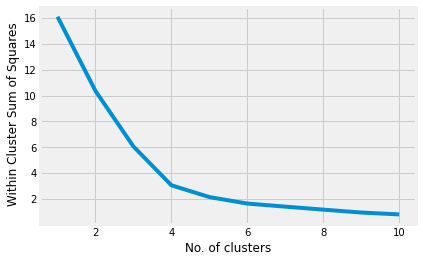

In [0]:
from sklearn.cluster import KMeans
#calculating WCSS which is the sum of squares of the distances of each data point represeting a country
#in all clusters to their respective centroids
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means = kmeans.fit(dfallvariables)
    wcss.append(y_means.inertia_)
#Plotting WCSS to find the number of clusters
plt.plot(range(1,11), wcss)
plt.xlabel("No. of clusters")
plt.ylabel(" Within Cluster Sum of Squares")
plt.show()

In [0]:
data_k=dfallvariables.copy()


# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_k)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
data_k['cluster'] = list(cluster[0])
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data_k.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools
cluster,,,,,,,
1,0.0,0.0,0.0,0.1,0.0,0.0,0.0
2,0.0,0.0,0.2,0.2,0.5,0.0,0.5
3,0.2,0.2,0.0,0.1,0.0,0.0,0.0
4,0.0,0.0,0.2,0.2,0.0,0.0,0.0
5,0.0,0.0,0.2,0.2,0.0,0.5,0.0


In [0]:
for group in range(1,6):
    countries=data_risk.loc[data_risk['Risk_Level']==group]
    listofcoutries= list(countries['country'])
    print("Group", group, ":", listofcoutries)

Group 1 : ['Afghanistan', 'Australia_New South Wales', 'Australia_Queensland', 'Australia_Tasmania', 'Australia_Victoria', 'Australia', 'Bahrain', 'Belarus', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Canada_British Columbia', 'Canada_Quebec', 'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Denmark', 'Dominican Republic', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France_Mayotte', 'France', 'Greece', 'Honduras', 'Hungary', 'Indonesia', 'Iraq', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Mexico', 'Moldova', 'Netherlands', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Philippines', 'Romania', 'Saudi Arabia', 'Senegal', 'Slovenia', 'South Africa', 'Sri Lanka', 'Thailand', 'US_Puerto Rico', 'US', 'United Arab Emirates', 'United Kingdom_Channel Islands', 'United Kingdom', 'Uruguay', 'Vietnam']
Group 2 : ['US_Alabama', 'US_Alaska', 'US_Arizona', 'US_Arkansas', 'US_California', 'US_Colorado', 'US_Connecticut', 'US_

In [0]:
data_risk= pd.DataFrame()
data_risk["country"]=data_k.index
data_risk["Risk_Level"]=y_kmeans1

In [0]:
for group in range(1,6):
    countries=data_risk.loc[data_risk['Risk_Level']==group]
    listofcoutries= list(countries['country'])
    print("Group", group, ":", listofcoutries)

Group 1 : ['Angola', 'Australia_Northern Territory', 'Benin', 'Botswana', 'Cambodia', 'Canada_New Brunswick', 'Canada_Northwest Territories', 'Canada_Yukon', 'Denmark_Greenland', 'Fiji', 'France_French Polynesia', 'France_New Caledonia', 'France_Reunion', 'France_Saint Barthelemy', 'France_Saint Pierre and Miquelon', 'Gabon', 'Guinea-Bissau', 'Laos', 'Libya', 'Liechtenstein', 'Mongolia', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands_Bonaire, Sint Eustatius and Saba', 'Netherlands_Curacao', 'Papua New Guinea', 'Tajikistan', 'Uganda', 'United Kingdom_Anguilla', 'United Kingdom_British Virgin Islands', 'United Kingdom_Falkland Islands (Malvinas)', 'United Kingdom_Gibraltar', 'United Kingdom_Montserrat', 'United Kingdom_Turks and Caicos Islands', 'Vietnam', 'Yemen']
Group 2 : ['Ireland', 'Israel', 'Japan', 'Kenya', 'Netherlands_Aruba', 'Norway', 'Paraguay', 'Poland', 'Portugal', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom_Bermuda']
Group 3 : ['US_Alabama', 'US_Alaska', 'US_Arizona'

In [0]:
import plotly

with means 

In [0]:
data = [dict(type='choropleth',
             colorscale='reds',
             locations =data_risk['country'].astype(str),
             z= data_risk['Risk_Level'].astype(int),
             locationmode='country names')]

fig = dict(data=data, 
           layout_title_text="Country grouped based on Health care quality, no. of COVID-19 cases and tests performed")

plotly.offline.iplot(fig)

with std

In [0]:
data = [dict(type='choropleth',
             colorscale='reds',
             locations =data_risk['country'].astype(str),
             z= data_risk['Risk_Level'].astype(int),
             locationmode='country names')]

fig = dict(data=data, 
           layout_title_text="Country grouped based on Health care quality, no. of COVID-19 cases and tests performed")

plotly.offline.iplot(fig)

Kmeans without *normalization*

In [0]:
train_df.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,4.402120e+05,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000,440212.000000
mean,1.692434e+06,0.973997,1.312527,20.985257,0.002192,0.002578,0.002378,0.196860,0.181285,0.222272,0.003807,0.404145
std,2.506873e+07,0.168266,28.982528,397.700216,0.046769,0.050712,0.048711,0.031579,0.026555,0.047106,0.005790,0.065734
min,8.600000e+01,0.476600,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.068866,0.000068,0.000076,0.000000
25%,1.188000e+04,0.874544,0.000000,0.000000,0.000000,0.000000,0.000000,0.195652,0.180347,0.232227,0.003607,0.416330
50%,2.881500e+04,0.973834,0.000000,0.000000,0.000000,0.000000,0.000000,0.195652,0.180347,0.232227,0.003607,0.416330
75%,9.245900e+04,1.065792,0.000000,0.000000,0.000000,0.000000,0.000000,0.195652,0.180347,0.232227,0.003607,0.416330
max,1.295210e+09,2.239186,4591.000000,36163.000000,1.000000,1.000000,1.000000,0.971014,1.000000,0.958787,0.317348,1.000000


In [0]:
train_df.shape

(440212, 15)

In [0]:
train_df.columns

Index(['Province_State', 'Country_Region', 'Population', 'Weight', 'Date',
       'Fatalities', 'ConfirmedCases', 'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+'],
      dtype='object')

In [0]:
train_df=train_df[['Date', 'Country_Region', 'Population', 'Weight', 
       'Fatalities', 'ConfirmedCases', 'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]

In [0]:
ndf=[]
for i in list(train_df.Country_Region.unique()):
    ndf.append(train_df[train_df['Country_Region']==i].iloc[:,2:].astype(float).describe().iloc[1])
nsworldbank=pd.DataFrame(ndf)

In [0]:
train_df[train_df['Country_Region']==i].iloc[:,2:].astype(float).describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,131.0,1.310000e+02,131.000000,131.000000,131.0,131.0,131.0,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02
mean,14240168.0,6.071064e-01,0.030534,1.641221,0.0,0.0,0.0,1.956522e-01,1.803465e-01,1.032633e-02,3.607093e-03,1.800786e-03
std,0.0,2.228970e-16,0.172713,7.460737,0.0,0.0,0.0,2.507591e-16,2.228970e-16,6.965531e-18,1.001295e-17,1.959056e-18
min,14240168.0,6.071064e-01,0.000000,0.000000,0.0,0.0,0.0,1.956522e-01,1.803465e-01,1.032633e-02,3.607093e-03,1.800786e-03
25%,14240168.0,6.071064e-01,0.000000,0.000000,0.0,0.0,0.0,1.956522e-01,1.803465e-01,1.032633e-02,3.607093e-03,1.800786e-03
50%,14240168.0,6.071064e-01,0.000000,0.000000,0.0,0.0,0.0,1.956522e-01,1.803465e-01,1.032633e-02,3.607093e-03,1.800786e-03
75%,14240168.0,6.071064e-01,0.000000,1.000000,0.0,0.0,0.0,1.956522e-01,1.803465e-01,1.032633e-02,3.607093e-03,1.800786e-03
max,14240168.0,6.071064e-01,1.000000,76.000000,0.0,0.0,0.0,1.956522e-01,1.803465e-01,1.032633e-02,3.607093e-03,1.800786e-03


In [0]:
nsworldbank['Countries']=list(train_df.Country_Region.unique() )

In [0]:
nsworldbank

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+,Countries
mean,27657145.0,0.583587,2.022901,120.229008,0.0,0.000000,0.0,0.036232,0.329191,0.027046,0.002278,0.001411,Afghanistan
mean,25868000.0,0.585874,0.030534,0.656489,0.0,0.000000,0.0,0.195652,0.180347,0.022835,0.003607,0.001629,Angola
mean,86295.0,0.879853,0.022901,0.198473,0.0,0.000000,0.0,0.275362,0.102905,0.000068,0.008467,0.057539,Antigua and Barbuda
mean,43590400.0,0.568494,4.244275,132.938931,0.0,0.564885,0.0,0.362319,0.256125,0.031401,0.000645,0.128352,Argentina
mean,426709.0,0.771375,0.022901,0.832061,0.0,0.000000,0.0,0.195652,0.180347,0.017717,0.003607,0.239587,Australia_Australian Capital Territory
...,...,...,...,...,...,...,...,...,...,...,...,...,...
mean,31028700.0,0.579696,0.221374,12.687023,0.0,0.000000,0.0,0.057971,0.195485,0.019756,0.001215,0.142573,Venezuela
mean,92700000.0,0.545111,0.000000,2.503817,0.0,0.000000,0.0,0.188406,0.229786,0.067628,0.011922,0.345157,Vietnam
mean,28500000.0,0.582567,0.641221,2.702290,0.0,0.000000,0.0,0.195652,0.180347,0.025933,0.003607,0.089348,Yemen
mean,15933883.0,0.602992,0.053435,8.312977,0.0,0.000000,0.0,0.144928,0.175359,0.012773,0.000949,0.000383,Zambia


In [0]:
nsworldbank[nsworldbank.Countries=='India']

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+,Countries
mean,1.295210e+09,0.4766,42.824427,1514.274809,0.0,0.541985,0.0,0.050725,0.848092,0.958787,0.017618,0.048935,India


In [0]:
dfallvariables=nsworldbank.set_index('Countries')

In [0]:

dfallvariables

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Countries,,,,,,,,,,,,
Afghanistan,27657145.0,0.583587,2.022901,120.229008,0.0,0.000000,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
Angola,25868000.0,0.585874,0.030534,0.656489,0.0,0.000000,0.0,0.195652,0.180347,0.022835,0.003607,0.001629
Antigua and Barbuda,86295.0,0.879853,0.022901,0.198473,0.0,0.000000,0.0,0.275362,0.102905,0.000068,0.008467,0.057539
Argentina,43590400.0,0.568494,4.244275,132.938931,0.0,0.564885,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
Australia_Australian Capital Territory,426709.0,0.771375,0.022901,0.832061,0.0,0.000000,0.0,0.195652,0.180347,0.017717,0.003607,0.239587
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,31028700.0,0.579696,0.221374,12.687023,0.0,0.000000,0.0,0.057971,0.195485,0.019756,0.001215,0.142573
Vietnam,92700000.0,0.545111,0.000000,2.503817,0.0,0.000000,0.0,0.188406,0.229786,0.067628,0.011922,0.345157
Yemen,28500000.0,0.582567,0.641221,2.702290,0.0,0.000000,0.0,0.195652,0.180347,0.025933,0.003607,0.089348


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(dfallvariables)


In [0]:
dfallvariables

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Countries,,,,,,,,,,,,
Afghanistan,27657145.0,0.583587,2.022901,120.229008,0.0,0.000000,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
Angola,25868000.0,0.585874,0.030534,0.656489,0.0,0.000000,0.0,0.195652,0.180347,0.022835,0.003607,0.001629
Antigua and Barbuda,86295.0,0.879853,0.022901,0.198473,0.0,0.000000,0.0,0.275362,0.102905,0.000068,0.008467,0.057539
Argentina,43590400.0,0.568494,4.244275,132.938931,0.0,0.564885,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
Australia_Australian Capital Territory,426709.0,0.771375,0.022901,0.832061,0.0,0.000000,0.0,0.195652,0.180347,0.017717,0.003607,0.239587
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,31028700.0,0.579696,0.221374,12.687023,0.0,0.000000,0.0,0.057971,0.195485,0.019756,0.001215,0.142573
Vietnam,92700000.0,0.545111,0.000000,2.503817,0.0,0.000000,0.0,0.188406,0.229786,0.067628,0.011922,0.345157
Yemen,28500000.0,0.582567,0.641221,2.702290,0.0,0.000000,0.0,0.195652,0.180347,0.025933,0.003607,0.089348


Now we are going to do Unsupervised learning to identify correlated countries

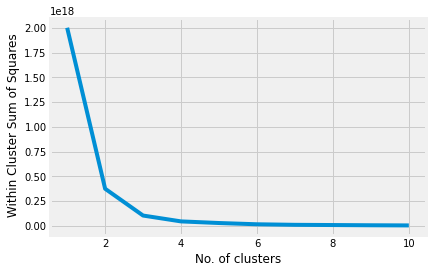

In [0]:
from sklearn.cluster import KMeans
#calculating WCSS which is the sum of squares of the distances of each data point represeting a country
#in all clusters to their respective centroids
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means = kmeans.fit(dfallvariables)
    wcss.append(y_means.inertia_)
#Plotting WCSS to find the number of clusters
plt.plot(range(1,11), wcss)
plt.xlabel("No. of clusters")
plt.ylabel(" Within Cluster Sum of Squares")
plt.show()

In [0]:
data_k=dfallvariables.copy()
kmeans_covid = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(data_k)

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_k)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
data_k['cluster'] = list(cluster[0])
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data_k.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
cluster,,,,,,,,,,,,
1,5.988786e+06,0.8,2.6,57.4,0.0,0.0,0.0,0.2,0.2,0.1,0.0,0.2
2,1.295210e+09,0.5,42.8,1514.3,0.0,0.5,0.0,0.1,0.8,1.0,0.0,0.0
3,2.218504e+08,0.5,177.2,3177.0,0.0,0.0,0.0,0.1,0.3,0.1,0.0,0.0
4,7.362805e+07,0.6,72.4,700.3,0.1,0.2,0.1,0.3,0.2,0.1,0.0,0.2


In [0]:
data_risk= pd.DataFrame()
data_risk["country"]=data_k.index
data_risk["Risk_Level"]=y_kmeans1

In [0]:
data_k.loc[['Italy']]

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+,cluster
Countries,,,,,,,,,,,,,
Italy,60665551.0,0.558008,255.534351,1780.129771,0.0,0.656489,0.0,0.246377,0.148757,0.042007,0.007822,0.384824,4


In [0]:
data_k.loc[['US']]

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+,cluster
Countries,,,,,,,,,,,,,
US,324141489.0,0.51029,802.748092,13825.847328,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348,3


In [0]:
data_k.loc[['India']]

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+,cluster
Countries,,,,,,,,,,,,,
India,1.295210e+09,0.4766,42.824427,1514.274809,0.0,0.541985,0.0,0.050725,0.848092,0.958787,0.017618,0.048935,2


In [0]:
for group in range(1,6):
    countries=data_risk.loc[data_risk['Risk_Level']==group]
    listofcoutries= list(countries['country'])
    print("Group", group, ":", listofcoutries)

Group 1 : ['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Australia_Australian Capital Territory', 'Australia_New South Wales', 'Australia_Northern Territory', 'Australia_Queensland', 'Australia_South Australia', 'Australia_Tasmania', 'Australia_Victoria', 'Australia_Western Australia', 'Australia', 'Austria', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada_Alberta', 'Canada_British Columbia', 'Canada_Manitoba', 'Canada_New Brunswick', 'Canada_Newfoundland and Labrador', 'Canada_Northwest Territories', 'Canada_Nova Scotia', 'Canada_Ontario', 'Canada_Prince Edward Island', 'Canada_Quebec', 'Canada_Saskatchewan', 'Canada_Yukon', 'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Denmark_Faroe Islands', 'Denmark_Greenland', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France_French Guiana', 'France_French Polynesia', 'France_

In [0]:
data_risk

,country,Risk_Level
0,Afghanistan,1
1,Angola,1
2,Antigua and Barbuda,1
3,Argentina,4
4,Australia_Australian Capital Territory,1
...,...,...
214,Venezuela,1
215,Vietnam,4
216,Yemen,1
217,Zambia,1


In [0]:
for group in range(1,6):
    countries=data_risk.loc[data_risk['Risk_Level']==group]
    listofcoutries= list(countries['country'])
    print("Group", group, ":", listofcoutries)

Group 1 : ['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Australia_Australian Capital Territory', 'Australia_New South Wales', 'Australia_Northern Territory', 'Australia_Queensland', 'Australia_South Australia', 'Australia_Tasmania', 'Australia_Victoria', 'Australia_Western Australia', 'Australia', 'Austria', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada_Alberta', 'Canada_British Columbia', 'Canada_Manitoba', 'Canada_New Brunswick', 'Canada_Newfoundland and Labrador', 'Canada_Northwest Territories', 'Canada_Nova Scotia', 'Canada_Ontario', 'Canada_Prince Edward Island', 'Canada_Quebec', 'Canada_Saskatchewan', 'Canada_Yukon', 'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Denmark_Faroe Islands', 'Denmark_Greenland', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France_French Guiana', 'France_French Polynesia', 'France_

In [0]:
import plotly

See the clusters 

In [0]:
data = [dict(type='choropleth',
             colorscale='reds',
             locations =data_risk['country'].astype(str),
             z= data_risk['Risk_Level'].astype(int),
             locationmode='country names')]

fig = dict(data=data, 
           layout_title_text="Country grouped based on Health care quality, no. of COVID-19 cases and tests performed")

plotly.offline.iplot(fig)

## Train per clusters 




In [0]:
train_df0=train_df[train_df.Country_Region.isin(['Bangladesh', 'Brazil', 'Indonesia', 'Nigeria', 'Pakistan', 'US'])]
train_df1=train_df[train_df.Country_Region.isin(['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Australia_Australian Capital Territory', 'Australia_New South Wales', 'Australia_Northern Territory', 'Australia_Queensland', 'Australia_South Australia', 'Australia_Tasmania', 'Australia_Victoria', 'Australia_Western Australia', 'Australia', 'Austria', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada_Alberta', 'Canada_British Columbia', 'Canada_Manitoba', 'Canada_New Brunswick', 'Canada_Newfoundland and Labrador', 'Canada_Northwest Territories', 'Canada_Nova Scotia', 'Canada_Ontario', 'Canada_Prince Edward Island', 'Canada_Quebec', 'Canada_Saskatchewan', 'Canada_Yukon', 'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Denmark_Faroe Islands', 'Denmark_Greenland', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France_French Guiana', 'France_French Polynesia', 'France_Guadeloupe', 'France_Martinique', 'France_Mayotte', 'France_New Caledonia', 'France_Reunion', 'France_Saint Barthelemy', 'France_Saint Pierre and Miquelon', 'France_St Martin', 'Gabon', 'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iraq', 'Ireland', 'Israel', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Moldova', 'Mongolia', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands_Aruba', 'Netherlands_Bonaire, Sint Eustatius and Saba', 'Netherlands_Curacao', 'Netherlands_Sint Maarten', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Oman', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Singapore', 'Slovakia', 'Slovenia', 'Sri Lanka', 'Sweden', 'Switzerland', 'Tajikistan', 'Togo', 'Trinidad and Tobago', 'US_Alabama', 'US_Alaska', 'US_Arizona', 'US_Arkansas', 'US_California', 'US_Colorado', 'US_Connecticut', 'US_Delaware', 'US_District of Columbia', 'US_Florida', 'US_Georgia', 'US_Guam', 'US_Hawaii', 'US_Idaho', 'US_Illinois', 'US_Indiana', 'US_Iowa', 'US_Kansas', 'US_Kentucky', 'US_Louisiana', 'US_Maine', 'US_Maryland', 'US_Massachusetts', 'US_Michigan', 'US_Minnesota', 'US_Mississippi', 'US_Missouri', 'US_Montana', 'US_Nebraska', 'US_Nevada', 'US_New Hampshire', 'US_New Jersey', 'US_New Mexico', 'US_New York', 'US_North Carolina', 'US_North Dakota', 'US_Ohio', 'US_Oklahoma', 'US_Oregon', 'US_Pennsylvania', 'US_Puerto Rico', 'US_Rhode Island', 'US_South Carolina', 'US_South Dakota', 'US_Tennessee', 'US_Texas', 'US_Utah', 'US_Vermont', 'US_Virgin Islands', 'US_Virginia', 'US_Washington', 'US_West Virginia', 'US_Wisconsin', 'US_Wyoming', 'Uganda', 'United Arab Emirates', 'United Kingdom_Anguilla', 'United Kingdom_Bermuda', 'United Kingdom_British Virgin Islands', 'United Kingdom_Cayman Islands', 'United Kingdom_Channel Islands', 'United Kingdom_Falkland Islands (Malvinas)', 'United Kingdom_Gibraltar', 'United Kingdom_Isle of Man', 'United Kingdom_Montserrat', 'United Kingdom_Turks and Caicos Islands', 'Uruguay', 'Venezuela', 'Yemen', 'Zambia', 'Zimbabwe'])]
train_df2=train_df[train_df.Country_Region.isin(['Argentina', 'Colombia', 'Egypt', 'France', 'Germany', 'Italy', 'Japan', 'Kenya', 'Mexico', 'Philippines', 'South Africa', 'Spain', 'Tanzania', 'Thailand', 'Turkey', 'United Kingdom', 'Vietnam'])]

## Cluster 1 : Train df0

In [0]:
dataset=train_df0


In [0]:
dataset

,Date,Country_Region,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
1965,2020-01-23,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
1966,2020-01-24,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
1967,2020-01-25,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
1968,2020-01-26,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
1969,2020-01-27,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437718,2020-05-28,US,324141489,0.510290,1198.0,22577.0,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
437719,2020-05-29,US,324141489,0.510290,1193.0,24266.0,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
437720,2020-05-30,US,324141489,0.510290,967.0,24146.0,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
437721,2020-05-31,US,324141489,0.510290,605.0,20007.0,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348


In [0]:
dataset.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,7.860000e+02,786.000000,786.000000,786.000000,786.0,786.0,786.0,786.000000,786.000000,786.000000,786.000000,786.000000
mean,2.218504e+08,0.521182,177.165394,3177.029262,0.0,0.0,0.0,0.094203,0.327062,0.129127,0.012967,0.048705
std,5.443240e+07,0.006213,501.748482,7733.815172,0.0,0.0,0.0,0.062935,0.153433,0.051203,0.016017,0.051513
min,1.610068e+08,0.510290,0.000000,0.000000,0.0,0.0,0.0,0.021739,0.180347,0.025933,0.000949,0.000205
25%,1.869880e+08,0.516230,0.000000,0.000000,0.0,0.0,0.0,0.043478,0.184984,0.114421,0.003607,0.005357
50%,2.001305e+08,0.523177,2.000000,92.500000,0.0,0.0,0.0,0.072464,0.274895,0.145450,0.007157,0.028578
75%,2.587050e+08,0.525029,24.000000,890.750000,0.0,0.0,0.0,0.159420,0.442860,0.153470,0.010897,0.089348
max,3.241415e+08,0.529186,4591.000000,36163.000000,0.0,0.0,0.0,0.195652,0.604393,0.190036,0.048031,0.140166


In [0]:
dataset.columns

Index(['Date', 'Country_Region', 'Population', 'Weight', 'Fatalities',
       'ConfirmedCases', 'restrictions', 'quarantine', 'schools', 'hospibed',
       'lung', 'total_pop', 'density', 'age_100+'],
      dtype='object')

in this case is usefull to work with the other variables

In [0]:

values=train_df0[['Fatalities', 'ConfirmedCases','Country_Region','Population', 'Weight', 'Date',
        'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
values


,Fatalities,ConfirmedCases,Country_Region,Population,Weight,Date,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
1965,0.0,0.0,Bangladesh,161006790,0.529186,2020-01-23,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
1966,0.0,0.0,Bangladesh,161006790,0.529186,2020-01-24,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
1967,0.0,0.0,Bangladesh,161006790,0.529186,2020-01-25,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
1968,0.0,0.0,Bangladesh,161006790,0.529186,2020-01-26,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
1969,0.0,0.0,Bangladesh,161006790,0.529186,2020-01-27,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437718,1198.0,22577.0,US,324141489,0.510290,2020-05-28,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
437719,1193.0,24266.0,US,324141489,0.510290,2020-05-29,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
437720,967.0,24146.0,US,324141489,0.510290,2020-05-30,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
437721,605.0,20007.0,US,324141489,0.510290,2020-05-31,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348


In [0]:

values=values.set_index('Date')
values

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-01-24,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-01-25,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-01-26,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-01-27,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,1198.0,22577.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
2020-05-29,1193.0,24266.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
2020-05-30,967.0,24146.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348


In [0]:
def create_datasetMultipleTimesBackAhead_basedoncountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  for j in list(dataset.Country_Region.unique()):
    datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
       'restrictions', 'quarantine', 'schools',
      'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
    print (j)
    for i in range(int(dataset[dataset.Country_Region==j].shape[0]/overlap)-1):
      startx = i*overlap
      endx = startx + n_steps_in
      starty = endx
      endy = endx + n_steps_out
      
      a = datas.iloc[startx:endx].values
      dataX.append(a)
      b=datas.iloc[starty:endy].values
      if b.shape[0]==0:
        print(starty,endy)
        print (i)
      
      dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for j in list(sequence.Country_Region.unique()):
    for i in range(sequence[sequence.Country_Region==j].shape[0]):
      end_ix = i + n_steps
      if end_ix > sequence[sequence.Country_Region==j].shape[0]-1:
        break
      seque=sequence[sequence.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
        'restrictions', 'quarantine', 'schools',
        'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
      seq_x, seq_y = seque.iloc[i:end_ix].values, seque.iloc[end_ix].values
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [0]:
time_ahead=10
n_steps_out=2
overlap =time_ahead
n_steps=time_ahead

In [0]:
dataset=values

train_size = int(len(dataset[dataset['Country_Region']=='Brazil']) * 0.70)
test_size = int(len(dataset[dataset['Country_Region']=='Brazil']) * 0.90)

maxdatetrain=dataset[dataset['Country_Region']=='Brazil'].iloc[train_size,:].name
maxdatetest=dataset[dataset['Country_Region']=='Brazil'].iloc[test_size,:].name
train, val,test = dataset[dataset.index<maxdatetrain], dataset[(dataset.index>maxdatetrain)& (dataset.index<maxdatetest)],dataset[(dataset.index>maxdatetest)]

from sklearn.preprocessing import MinMaxScaler

time_ahead=2
look_back=3




In [0]:
train

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-01-24,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-01-25,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-01-26,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-01-27,0.0,0.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-18,1891.0,32490.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
2020-04-19,1997.0,26889.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
2020-04-20,1433.0,25240.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348


In [0]:
test

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-05-19,21.0,1251.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-05-20,16.0,1617.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-05-21,22.0,1773.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-05-22,24.0,1694.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-05-23,20.0,1873.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,1198.0,22577.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
2020-05-29,1193.0,24266.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
2020-05-30,967.0,24146.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348


In [0]:
val

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-04-23,7.0,414.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-04-24,4.0,503.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-04-25,9.0,309.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-04-26,5.0,418.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
2020-04-27,7.0,497.0,Bangladesh,161006790,0.529186,0.0,0.0,0.0,0.057971,0.604393,0.114421,0.048031,0.049106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,1779.0,27368.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
2020-05-15,1632.0,25050.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348
2020-05-16,1224.0,24994.0,US,324141489,0.510290,0.0,0.0,0.0,0.195652,0.180347,0.025933,0.003607,0.089348


In [0]:
def Scalerpercountrie(train):
    df_ = pd.DataFrame(columns=train.columns)
    from sklearn.externals import joblib
    for i in list(dataset.Country_Region.unique()):
      scaler = MinMaxScaler(feature_range=(0, 1))
      trainfor = pd.DataFrame(scaler.fit_transform(train[train['Country_Region']==i].drop('Country_Region',axis=1)),columns=train[train['Country_Region']==i].drop('Country_Region',axis=1).columns,index=train[train['Country_Region']==i].index)
      trainfor['Country_Region']=list(train[train['Country_Region']==i].iloc[:,2])
      joblib.dump(scaler, i) 
      df_=df_.append(trainfor)
    return df_


In [0]:
def create_datasetMultipleTimesBackAhead_basedononecountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  
  datas=dataset[['Fatalities', 'ConfirmedCases','Population', 'Weight', 
      'restrictions', 'quarantine', 'schools',
    'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
  for i in range(int(datas.shape[0]/overlap)-1):
    startx = i*overlap
    endx = startx + n_steps_in
    starty = endx
    endy = endx + n_steps_out
    
    a = datas.iloc[startx:endx].values
    dataX.append(a)
    b=datas.iloc[starty:endy].values
    if b.shape[0]==0:
      print(starty,endy)
      print (i)
    
    dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
trainN=Scalerpercountrie(train)
testN=Scalerpercountrie(test)
valN=Scalerpercountrie(val)
X_train, y_train = split_sequence(trainN, look_back)
X_val, y_val = split_sequence(valN, look_back)
X_testS, y_testS = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Singapore'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testB, y_testB = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Brazil'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testIndi, y_testIndi = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='India'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testIndo, y_testIndo = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Indonesia'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testP, y_testP = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Pakistan'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

In [0]:
y_testIndo

array([[[0.16666667, 0.95698925, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.05555556, 0.19892473, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.11469534, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.22222222, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ]],

       [[1.        , 0.48566308, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.11111111, 0.4874552 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        

In [0]:
#Invert the scaler transform

df_q = pd.DataFrame(columns=train.columns)
from sklearn.externals import joblib
for i in list(df_.Country_Region.unique()):
  scaler = joblib.load(i) 
  trainforinver = pd.DataFrame(scaler.inverse_transform(df_[df_['Country_Region']==i].drop('Country_Region',axis=1)),columns=df_[df_['Country_Region']==i].drop('Country_Region',axis=1).columns,index=df_[df_['Country_Region']==i].index)
  trainforinver['Country_Region']=list(df_[df_['Country_Region']==i].iloc[:,2])
  joblib.dump(scaler, i) 
  df_q=df_q.append(trainforinver)
from sklearn.externals import joblib

joblib.dump(scaler, "Brazil") 

# And now to load...

scaler = joblib.load("Brazil") 

NameError: ignored

### train

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model6b = Sequential()

model6b.add(LSTM(50,activation = 'relu',input_shape=(look_back,12)))
model6b.add(Dense(12))

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
model6b.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), optimizer="adam",metrics=[tf.keras.metrics.MeanSquaredError()])             

model6b.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size = 16,epochs=400, verbose=1)



Train on 528 samples, validate on 132 samples
Epoch 1/400
528/528 [==============================] - 0s 786us/step - loss: 0.0058 - mean_squared_error: 0.0110 - val_loss: 0.0132 - val_mean_squared_error: 0.0126
Epoch 2/400
528/528 [==============================] - 0s 200us/step - loss: 0.0034 - mean_squared_error: 0.0124 - val_loss: 0.0068 - val_mean_squared_error: 0.0113
Epoch 3/400
528/528 [==============================] - 0s 183us/step - loss: 0.0019 - mean_squared_error: 0.0106 - val_loss: 0.0051 - val_mean_squared_error: 0.0099
Epoch 4/400
528/528 [==============================] - 0s 179us/step - loss: 0.0011 - mean_squared_error: 0.0094 - val_loss: 0.0052 - val_mean_squared_error: 0.0091
Epoch 5/400
528/528 [==============================] - 0s 191us/step - loss: 0.0010 - mean_squared_error: 0.0089 - val_loss: 0.0051 - val_mean_squared_error: 0.0086
Epoch 6/400
528/528 [==============================] - 0s 193us/step - loss: 9.8173e-04 - mean_squared_error: 0.0085 - val_loss: 

In [0]:
from sklearn.externals import joblib
X_test=X_testIndo
y_test=y_testIndo
scaler = joblib.load("Indonesia") 

trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model6b.predict(xtest)
    testPredict.append(temPredict)
testPredict=np.array(testPredict)

In [0]:
testPredict.shape

(5, 2, 12)

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)

# calculate root mean squared error


In [0]:
testPredict

array([[[ 0.29875076,  0.51224399, -0.25232059, -0.22616522,
         -0.19483623, -0.17369416, -0.24741268, -0.14862147,
         -0.24959767, -0.19111316, -0.22651088, -0.1437383 ],
        [ 0.25523666,  0.59333575, -0.23500748, -0.32192793,
         -0.1636067 , -0.23325373, -0.22565442, -0.08274072,
         -0.27437222, -0.10774162, -0.14371835, -0.17786513]],

       [[ 0.47599989,  0.90850121, -0.13640223, -0.3486914 ,
         -0.33231267, -0.11741288, -0.16532913, -0.11880241,
         -0.26573968, -0.2581504 , -0.19324918, -0.25678435],
        [ 0.3428638 ,  0.82476282, -0.21864808, -0.35288048,
         -0.29547334, -0.14236493, -0.23524991, -0.16592866,
         -0.23123947, -0.22963862, -0.17354448, -0.18830867]],

       [[-0.3492564 ,  0.51673847, -0.90293467, -0.34587479,
          0.00875047, -0.22631235, -0.01627973, -0.37386578,
         -0.78918451,  0.21938267, -0.45870936, -0.38866484],
        [-0.07284996,  0.29812512, -0.23422374, -0.25586328,
          0.015

In [0]:
testPredict.reshape(-1, 12)

array([[ 0.29875076,  0.51224399, -0.25232059, -0.22616522, -0.19483623,
        -0.17369416, -0.24741268, -0.14862147, -0.24959767, -0.19111316,
        -0.22651088, -0.1437383 ],
       [ 0.25523666,  0.59333575, -0.23500748, -0.32192793, -0.1636067 ,
        -0.23325373, -0.22565442, -0.08274072, -0.27437222, -0.10774162,
        -0.14371835, -0.17786513],
       [ 0.47599989,  0.90850121, -0.13640223, -0.3486914 , -0.33231267,
        -0.11741288, -0.16532913, -0.11880241, -0.26573968, -0.2581504 ,
        -0.19324918, -0.25678435],
       [ 0.3428638 ,  0.82476282, -0.21864808, -0.35288048, -0.29547334,
        -0.14236493, -0.23524991, -0.16592866, -0.23123947, -0.22963862,
        -0.17354448, -0.18830867],
       [-0.3492564 ,  0.51673847, -0.90293467, -0.34587479,  0.00875047,
        -0.22631235, -0.01627973, -0.37386578, -0.78918451,  0.21938267,
        -0.45870936, -0.38866484],
       [-0.07284996,  0.29812512, -0.23422374, -0.25586328,  0.01525749,
        -0.26989654, -

In [0]:
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
testY=np.array(a).flatten()

#testY = scaler.inverse_transform(y_test)

In [0]:
y_test

array([[[0.16666667, 0.95698925, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.05555556, 0.19892473, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.11469534, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.22222222, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ]],

       [[1.        , 0.48566308, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.11111111, 0.4874552 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        

In [0]:
testPredict[:,0]

array([  5.53290068,  25.60617438,  60.32777035, -79.53697896,
         3.92986512,  11.70545363,  11.3839278 ,  24.36110735,
         0.55379188,  41.81550115])

In [0]:
testY

array([16.5       , 10.83333333,  8.        , 19.33333333, 59.        ,
       13.66666667, 15.08333333, 56.16666667, 37.75      , 20.75      ])

In [0]:
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 5.19 RMSE


In [0]:
testPredict[:,0]

array([  5.53290068,  25.60617438,  60.32777035, -79.53697896,
         3.92986512,  11.70545363,  11.3839278 ,  24.36110735,
         0.55379188,  41.81550115])

In [0]:
testScore = math.sqrt(mean_squared_log_error(testY, abs(testPredict[:,0])))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 1.58 RMSE


In [0]:
testY

array([16.5       , 10.83333333,  8.        , 19.33333333, 59.        ,
       13.66666667, 15.08333333, 56.16666667, 37.75      , 20.75      ])

In [0]:
testPredict[:,0]

array([  5.53290068,  25.60617438,  60.32777035, -79.53697896,
         3.92986512,  11.70545363,  11.3839278 ,  24.36110735,
         0.55379188,  41.81550115])

# ******** 1) Train per clusters predict Fatalities and Confirmed cases




In [0]:
train_df0=train_df[train_df.Country_Region.isin(['Bangladesh', 'Brazil', 'Indonesia', 'Nigeria', 'Pakistan', 'US'])]
train_df1=train_df[train_df.Country_Region.isin(['Afghanistan', 'Angola', 'Antigua and Barbuda',  'Australia', 'Austria', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',  'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Denmark_Faroe Islands', 'Denmark_Greenland', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France_French Guiana', 'France_French Polynesia',  'Gabon', 'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iraq', 'Ireland', 'Israel', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Moldova', 'Mongolia', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands_Aruba', 'Netherlands_Bonaire, Sint Eustatius and Saba', 'Netherlands_Curacao', 'Netherlands_Sint Maarten', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Oman', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Singapore', 'Slovakia', 'Slovenia', 'Sri Lanka', 'Sweden', 'Switzerland', 'Tajikistan', 'Togo', 'Trinidad and Tobago', 'Uganda', 'United Arab Emirates','Uruguay', 'Venezuela', 'Yemen', 'Zambia', 'Zimbabwe'])]
train_df2=train_df[train_df.Country_Region.isin(['Argentina', 'Colombia', 'Egypt', 'France', 'Germany', 'Italy', 'Japan', 'Kenya', 'Mexico', 'Philippines', 'South Africa', 'Spain', 'Tanzania', 'Thailand', 'Turkey', 'United Kingdom', 'Vietnam'])]

## Cluster 1 : Train df0

In [0]:
dataset=train_df2


In [0]:
dataset.Country_Region.unique()

array(['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Australia',
       'Austria', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Chile', 'Costa Rica', 'Croatia', 'Denmark_Faroe Islands',
       'Denmark_Greenland', 'Denmark', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland',
       'France_French Guiana', 'France_French Polynesia', 'Gabon',
       'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau',
       'Haiti', 'Honduras', 'Hungary', 'Iraq', 'Ireland', 'Israel',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Libya', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Moldova',
       'Mongolia', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands_Aruba',
       'Netherlands_Bonaire, Sint Eustatius 

In [0]:
dataset

,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
0,NaN,Afghanistan,27657145,0.583587,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
1,NaN,Afghanistan,27657145,0.583587,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2,NaN,Afghanistan,27657145,0.583587,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
3,NaN,Afghanistan,27657145,0.583587,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
4,NaN,Afghanistan,27657145,0.583587,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440207,NaN,Zimbabwe,14240168,0.607106,2020-05-28,0.0,17.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440208,NaN,Zimbabwe,14240168,0.607106,2020-05-29,0.0,0.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440209,NaN,Zimbabwe,14240168,0.607106,2020-05-30,0.0,25.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440210,NaN,Zimbabwe,14240168,0.607106,2020-05-31,0.0,4.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
dataset.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,1.349300e+04,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000
mean,1.052262e+07,0.661331,3.878381,92.941229,0.052990,0.050619,0.053657,0.232236,0.188992,0.010046,0.009077,0.126952
std,1.021963e+07,0.091248,20.147417,365.594463,0.224023,0.219226,0.225349,0.145170,0.120596,0.009595,0.032239,0.163638
min,1.740800e+04,0.572589,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.068866,0.000068,0.000076,0.000000
25%,2.587564e+06,0.602444,0.000000,0.000000,0.000000,0.000000,0.000000,0.137681,0.141407,0.002998,0.002430,0.005795
50%,6.854536e+06,0.635307,0.000000,0.000000,0.000000,0.000000,0.000000,0.195652,0.180347,0.006565,0.003607,0.066552
75%,1.617613e+07,0.677221,0.000000,25.000000,0.000000,0.000000,0.000000,0.318841,0.190322,0.013366,0.004670,0.202149
max,3.843724e+07,1.024093,496.000000,11536.000000,1.000000,1.000000,1.000000,0.797101,1.000000,0.045350,0.317348,1.000000


In [0]:
dataset.columns

Index(['Province_State', 'Country_Region', 'Population', 'Weight', 'Date',
       'Fatalities', 'ConfirmedCases', 'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+'],
      dtype='object')

in this case is usefull to work with the other variables

In [0]:

values=train_df2[['Fatalities', 'ConfirmedCases','Country_Region','Population', 'Weight', 'Date',
        'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
values


,Fatalities,ConfirmedCases,Country_Region,Population,Weight,Date,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
393,0.0,0.0,Argentina,43590400,0.568494,2020-01-23,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
394,0.0,0.0,Argentina,43590400,0.568494,2020-01-24,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
395,0.0,0.0,Argentina,43590400,0.568494,2020-01-25,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
396,0.0,0.0,Argentina,43590400,0.568494,2020-01-26,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
397,0.0,0.0,Argentina,43590400,0.568494,2020-01-27,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440207,0.0,17.0,Zimbabwe,14240168,0.607106,2020-05-28,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440208,0.0,0.0,Zimbabwe,14240168,0.607106,2020-05-29,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440209,0.0,25.0,Zimbabwe,14240168,0.607106,2020-05-30,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440210,0.0,4.0,Zimbabwe,14240168,0.607106,2020-05-31,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:

values=values.set_index('Date')
values

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-24,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-25,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-26,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-27,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,0.0,17.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-29,0.0,0.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-30,0.0,25.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
def create_datasetMultipleTimesBackAhead_basedoncountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  for j in list(dataset.Country_Region.unique()):
    datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
       'restrictions', 'quarantine', 'schools',
      'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
    print (j)
    for i in range(int(dataset[dataset.Country_Region==j].shape[0]/overlap)-1):
      startx = i*overlap
      endx = startx + n_steps_in
      starty = endx
      endy = endx + n_steps_out
      
      a = datas.iloc[startx:endx].values
      dataX.append(a)
      b=datas.iloc[starty:endy].values
      if b.shape[0]==0:
        print(starty,endy)
        print (i)
      
      dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for j in list(sequence.Country_Region.unique()):
    for i in range(sequence[sequence.Country_Region==j].shape[0]):
      end_ix = i + n_steps
      if end_ix > sequence[sequence.Country_Region==j].shape[0]-1:
        break
      seque=sequence[sequence.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
        'restrictions', 'quarantine', 'schools',
        'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
      seq_x, seq_y = seque.iloc[i:end_ix].values, seque.iloc[end_ix].values
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [0]:
def Scalerpercountrie(train):
    df_ = pd.DataFrame(columns=train.columns)
    from sklearn.externals import joblib
    for i in list(dataset.Country_Region.unique()):
      scaler = MinMaxScaler(feature_range=(0, 1))
      trainfor = pd.DataFrame(scaler.fit_transform(train[train['Country_Region']==i].drop('Country_Region',axis=1)),columns=train[train['Country_Region']==i].drop('Country_Region',axis=1).columns,index=train[train['Country_Region']==i].index)
      trainfor['Country_Region']=list(train[train['Country_Region']==i].iloc[:,2])
      joblib.dump(scaler, i) 
      df_=df_.append(trainfor)
    return df_


In [0]:
def create_datasetMultipleTimesBackAhead_basedononecountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  
  datas=dataset[['Fatalities', 'ConfirmedCases','Population', 'Weight', 
      'restrictions', 'quarantine', 'schools',
    'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
  for i in range(int(datas.shape[0]/overlap)-1):
    startx = i*overlap
    endx = startx + n_steps_in
    starty = endx
    endy = endx + n_steps_out
    
    a = datas.iloc[startx:endx].values
    dataX.append(a)
    b=datas.iloc[starty:endy].values
    if b.shape[0]==0:
      print(starty,endy)
      print (i)
    
    dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
dataset=values

train_size = int(len(dataset[dataset['Country_Region']=='Colombia']) * 0.60)
test_size = int(len(dataset[dataset['Country_Region']=='Colombia']) * 0.80)

maxdatetrain=dataset[dataset['Country_Region']=='Colombia'].iloc[train_size,:].name
maxdatetest=dataset[dataset['Country_Region']=='Colombia'].iloc[test_size,:].name
train, val,test = dataset[dataset.index<maxdatetrain], dataset[(dataset.index>maxdatetrain)& (dataset.index<maxdatetest)],dataset[(dataset.index>maxdatetest)]

from sklearn.preprocessing import MinMaxScaler




In [0]:
train

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-24,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-25,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-26,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
2020-01-27,0.0,0.0,Brazil,206135893,0.522356,0.0,0.0,0.0,0.159420,0.232499,0.14768,0.000949,0.140166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-05,6.0,339.0,Pakistan,194125062,0.523999,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
2020-04-06,6.0,609.0,Pakistan,194125062,0.523999,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357
2020-04-07,4.0,269.0,Pakistan,194125062,0.523999,0.0,0.0,0.0,0.043478,0.442860,0.15347,0.010897,0.005357


In [0]:
test

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-05-07,2.0,171.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2020-05-08,3.0,215.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2020-05-09,6.0,255.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2020-05-10,5.0,369.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2020-05-11,2.0,285.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,0.0,17.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-29,0.0,0.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-30,0.0,25.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
val

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-04-11,3.0,34.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2020-04-12,0.0,52.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2020-04-13,3.0,58.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2020-04-14,2.0,49.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
2020-04-15,2.0,70.0,Afghanistan,27657145,0.583587,0.0,0.0,0.0,0.036232,0.329191,0.027046,0.002278,0.001411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,0.0,0.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-02,0.0,6.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-03,0.0,0.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
time_ahead=4
look_back=5

trainN=Scalerpercountrie(train)
testN=Scalerpercountrie(test)
valN=Scalerpercountrie(val)
X_train, y_train = split_sequence(trainN, look_back)
X_val, y_val = split_sequence(valN, look_back)
X_testS, y_testS = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Singapore'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testC, y_testC = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Colombia'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testG, y_testG = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Germany'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

X_testB, y_testB = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Brazil'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testIndi, y_testIndi = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='India'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testIndo, y_testIndo = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Indonesia'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testP, y_testP = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Pakistan'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

In [0]:
testN[testN.Country_Region=='Singapore'].shape

(0, 13)

In [0]:
X_testC.shape

(0,)

In [0]:
y_testB.shape

(12,)

In [0]:
#Invert the scaler transform

df_q = pd.DataFrame(columns=train.columns)
from sklearn.externals import joblib
for i in list(df_.Country_Region.unique()):
  scaler = joblib.load(i) 
  trainforinver = pd.DataFrame(scaler.inverse_transform(df_[df_['Country_Region']==i].drop('Country_Region',axis=1)),columns=df_[df_['Country_Region']==i].drop('Country_Region',axis=1).columns,index=df_[df_['Country_Region']==i].index)
  trainforinver['Country_Region']=list(df_[df_['Country_Region']==i].iloc[:,2])
  joblib.dump(scaler, i) 
  df_q=df_q.append(trainforinver)
from sklearn.externals import joblib

joblib.dump(scaler, "Brazil") 

# And now to load...

scaler = joblib.load("Brazil") 

NameError: ignored

### train

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import LeakyReLU
model6b = Sequential()

model6b.add(LSTM(50,activation = 'relu',input_shape=(look_back,12)))
model6b.add(Dropout(0.4))
model6b.add(Dense(12,activation='relu'))

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
model6b.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), optimizer="adam",metrics=[tf.keras.losses.MeanSquaredLogarithmicError()])             

model6b.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size = 16,epochs=100, verbose=1)



Train on 3358 samples, validate on 920 samples
Epoch 1/100
3358/3358 [==============================] - 1s 392us/step - loss: 0.0072 - mean_squared_logarithmic_error: 0.0072 - val_loss: 0.0060 - val_mean_squared_logarithmic_error: 0.0060
Epoch 2/100
3358/3358 [==============================] - 1s 281us/step - loss: 0.0039 - mean_squared_logarithmic_error: 0.0039 - val_loss: 0.0057 - val_mean_squared_logarithmic_error: 0.0057
Epoch 3/100
3358/3358 [==============================] - 1s 291us/step - loss: 0.0030 - mean_squared_logarithmic_error: 0.0030 - val_loss: 0.0054 - val_mean_squared_logarithmic_error: 0.0055
Epoch 4/100
3358/3358 [==============================] - 1s 269us/step - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0055 - val_mean_squared_logarithmic_error: 0.0056
Epoch 5/100
3358/3358 [==============================] - 1s 295us/step - loss: 0.0026 - mean_squared_logarithmic_error: 0.0026 - val_loss: 0.0055 - val_mean_squared_logarithmic_error: 0.005

In [0]:
from sklearn.externals import joblib
X_test=X_testC
y_test=y_testC
scaler = joblib.load("Colombia") 

trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model6b.predict(xtest)
    testPredict.append(temPredict)
testPredict=np.array(testPredict)

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)

# calculate root mean squared error


In [0]:
testPredict.shape

(5, 4, 12)

In [0]:
y_test.shape

(5, 4, 12)

In [0]:
X_test.shape

(5, 5, 12)

In [0]:
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
b=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
   b.append(scaler.inverse_transform(i)[:,1].tolist())
testYFatalities=np.array(a).flatten()
testYConfirmed=np.array(b).flatten()

#testY = scaler.inverse_transform(y_test)

In [0]:
testYFatalities

array([0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [0]:
testYConfirmed

array([1367.60245184,  991.26269702, 1157.80385289, 1246.48161121,
        537.05954466, 1006.4028021 ,  191.        ,  506.7793345 ,
        764.16112084,  500.29071804,  859.32749562,  919.88791594,
        716.57793345,  275.35201401,  359.70402802,  684.13485114,
        338.07530648,  852.83887916,  625.73730298,  651.69176883])

In [0]:

testPredict[:,1]

array([798.31912881, 753.8037931 , 718.02977747, 725.71053645,
       903.40223795, 879.60142887, 869.51846129, 884.18788171,
       511.89958027, 545.70702156, 567.01758242, 562.12630337,
       724.81000727, 705.36053514, 714.27539489, 795.36593637,
       561.05716652, 595.6517013 , 597.49781004, 657.70400262])

In [0]:
testScore = math.sqrt(mean_squared_log_error(testYFatalities, abs(testPredict[:,0])))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.43 RMSE


In [0]:
testScore = math.sqrt(mean_squared_log_error(testYConfirmed, abs(testPredict[:,1])))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 1.37 RMSE


# **** 2) Divide in two branches, One with countrie information and the other with covid information



In [0]:
train_df0=train_df[train_df.Country_Region.isin(['Bangladesh', 'Brazil', 'Indonesia', 'Nigeria', 'Pakistan', 'US'])]
train_df1=train_df[train_df.Country_Region.isin(['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Australia_Australian Capital Territory', 'Australia_New South Wales', 'Australia_Northern Territory', 'Australia_Queensland', 'Australia_South Australia', 'Australia_Tasmania', 'Australia_Victoria', 'Australia_Western Australia', 'Australia', 'Austria', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada_Alberta', 'Canada_British Columbia', 'Canada_Manitoba', 'Canada_New Brunswick', 'Canada_Newfoundland and Labrador', 'Canada_Northwest Territories', 'Canada_Nova Scotia', 'Canada_Ontario', 'Canada_Prince Edward Island', 'Canada_Quebec', 'Canada_Saskatchewan', 'Canada_Yukon', 'Canada', 'Chile', 'Costa Rica', 'Croatia', 'Denmark_Faroe Islands', 'Denmark_Greenland', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France_French Guiana', 'France_French Polynesia', 'France_Guadeloupe', 'France_Martinique', 'France_Mayotte', 'France_New Caledonia', 'France_Reunion', 'France_Saint Barthelemy', 'France_Saint Pierre and Miquelon', 'France_St Martin', 'Gabon', 'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iraq', 'Ireland', 'Israel', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Moldova', 'Mongolia', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands_Aruba', 'Netherlands_Bonaire, Sint Eustatius and Saba', 'Netherlands_Curacao', 'Netherlands_Sint Maarten', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Oman', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Singapore', 'Slovakia', 'Slovenia', 'Sri Lanka', 'Sweden', 'Switzerland', 'Tajikistan', 'Togo', 'Trinidad and Tobago', 'US_Alabama', 'US_Alaska', 'US_Arizona', 'US_Arkansas', 'US_California', 'US_Colorado', 'US_Connecticut', 'US_Delaware', 'US_District of Columbia', 'US_Florida', 'US_Georgia', 'US_Guam', 'US_Hawaii', 'US_Idaho', 'US_Illinois', 'US_Indiana', 'US_Iowa', 'US_Kansas', 'US_Kentucky', 'US_Louisiana', 'US_Maine', 'US_Maryland', 'US_Massachusetts', 'US_Michigan', 'US_Minnesota', 'US_Mississippi', 'US_Missouri', 'US_Montana', 'US_Nebraska', 'US_Nevada', 'US_New Hampshire', 'US_New Jersey', 'US_New Mexico', 'US_New York', 'US_North Carolina', 'US_North Dakota', 'US_Ohio', 'US_Oklahoma', 'US_Oregon', 'US_Pennsylvania', 'US_Puerto Rico', 'US_Rhode Island', 'US_South Carolina', 'US_South Dakota', 'US_Tennessee', 'US_Texas', 'US_Utah', 'US_Vermont', 'US_Virgin Islands', 'US_Virginia', 'US_Washington', 'US_West Virginia', 'US_Wisconsin', 'US_Wyoming', 'Uganda', 'United Arab Emirates', 'United Kingdom_Anguilla', 'United Kingdom_Bermuda', 'United Kingdom_British Virgin Islands', 'United Kingdom_Cayman Islands', 'United Kingdom_Channel Islands', 'United Kingdom_Falkland Islands (Malvinas)', 'United Kingdom_Gibraltar', 'United Kingdom_Isle of Man', 'United Kingdom_Montserrat', 'United Kingdom_Turks and Caicos Islands', 'Uruguay', 'Venezuela', 'Yemen', 'Zambia', 'Zimbabwe'])]
train_df2=train_df[train_df.Country_Region.isin(['Argentina', 'Colombia', 'Egypt', 'France', 'Germany', 'Italy', 'Japan', 'Kenya', 'Mexico', 'Philippines', 'South Africa', 'Spain', 'Tanzania', 'Thailand', 'Turkey', 'United Kingdom', 'Vietnam'])]

## Cluster 1 : Train df0

In [0]:
dataset=train_df


In [0]:
dataset.Country_Region.unique()

array(['Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Luxembourg', 'Malaysia',
       'Mexico', 'Nepal', 'Netherlands', 'New Zealand', 'Norway',
       'Pakistan', 'Panama', 'Paraguay', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Romania', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'Uganda', 'United Kingdom',
       'Uruguay', 'Vietnam', 'Zimbabwe'], dtype=object)

In [0]:
dataset

,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
393,NaN,Argentina,43590400,0.568494,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
394,NaN,Argentina,43590400,0.568494,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
395,NaN,Argentina,43590400,0.568494,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
396,NaN,Argentina,43590400,0.568494,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
397,NaN,Argentina,43590400,0.568494,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440207,NaN,Zimbabwe,14240168,0.607106,2020-05-28,0.0,17.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440208,NaN,Zimbabwe,14240168,0.607106,2020-05-29,0.0,0.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440209,NaN,Zimbabwe,14240168,0.607106,2020-05-30,0.0,25.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440210,NaN,Zimbabwe,14240168,0.607106,2020-05-31,0.0,4.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
dataset.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,8.122000e+03,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,6.048350e+07,0.601464,30.008742,406.439054,0.099975,0.101945,0.110071,0.264843,0.232876,0.044438,0.012150,0.173078
std,1.668985e+08,0.052685,116.922528,1367.895184,0.299986,0.302595,0.312998,0.182325,0.178838,0.123511,0.040931,0.176252
min,5.762000e+05,0.476600,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.068866,0.000435,0.000266,0.000185
25%,6.378000e+06,0.560706,0.000000,0.000000,0.000000,0.000000,0.000000,0.152174,0.141495,0.004065,0.002202,0.043516
50%,1.738650e+07,0.599846,0.000000,14.000000,0.000000,0.000000,0.000000,0.202899,0.180347,0.012652,0.003778,0.140893
75%,5.565365e+07,0.638229,6.000000,218.000000,0.000000,0.000000,0.000000,0.347826,0.237224,0.041206,0.008315,0.270913
max,1.295210e+09,0.753908,1918.000000,33274.000000,1.000000,1.000000,1.000000,0.971014,1.000000,0.958787,0.317348,0.875839


In [0]:
dataset.columns

Index(['Province_State', 'Country_Region', 'Population', 'Weight', 'Date',
       'Fatalities', 'ConfirmedCases', 'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+'],
      dtype='object')

in this case is usefull to work with the other variables

In [0]:

values=train_df[['Fatalities', 'ConfirmedCases','Country_Region','Population', 'Weight', 'Date',
        'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
values


,Fatalities,ConfirmedCases,Country_Region,Population,Weight,Date,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
393,0.0,0.0,Argentina,43590400,0.568494,2020-01-23,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
394,0.0,0.0,Argentina,43590400,0.568494,2020-01-24,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
395,0.0,0.0,Argentina,43590400,0.568494,2020-01-25,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
396,0.0,0.0,Argentina,43590400,0.568494,2020-01-26,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
397,0.0,0.0,Argentina,43590400,0.568494,2020-01-27,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440207,0.0,17.0,Zimbabwe,14240168,0.607106,2020-05-28,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440208,0.0,0.0,Zimbabwe,14240168,0.607106,2020-05-29,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440209,0.0,25.0,Zimbabwe,14240168,0.607106,2020-05-30,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440210,0.0,4.0,Zimbabwe,14240168,0.607106,2020-05-31,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:

values=values.set_index('Date')
values

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-24,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-25,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-26,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-27,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,0.0,17.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-29,0.0,0.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-30,0.0,25.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
def create_datasetMultipleTimesBackAhead_basedoncountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  for j in list(dataset.Country_Region.unique()):
    datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
       'restrictions', 'quarantine', 'schools',
      'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
    print (j)
    for i in range(int(dataset[dataset.Country_Region==j].shape[0]/overlap)-1):
      startx = i*overlap
      endx = startx + n_steps_in
      starty = endx
      endy = endx + n_steps_out
      
      a = datas.iloc[startx:endx].values
      dataX.append(a)
      b=datas.iloc[starty:endy].values
      if b.shape[0]==0:
        print(starty,endy)
        print (i)
      
      dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for j in list(sequence.Country_Region.unique()):
    for i in range(sequence[sequence.Country_Region==j].shape[0]):
      end_ix = i + n_steps
      if end_ix > sequence[sequence.Country_Region==j].shape[0]-1:
        break
      seque=sequence[sequence.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
        'restrictions', 'quarantine', 'schools',
        'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
      seq_x, seq_y = seque.iloc[i:end_ix].values, seque.iloc[end_ix].values
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [0]:
def Scalerpercountrie(train):
    df_ = pd.DataFrame(columns=train.columns)
    from sklearn.externals import joblib
    for i in list(dataset.Country_Region.unique()):
      scaler = MinMaxScaler(feature_range=(0, 1))
      trainfor = pd.DataFrame(scaler.fit_transform(train[train['Country_Region']==i].drop('Country_Region',axis=1)),columns=train[train['Country_Region']==i].drop('Country_Region',axis=1).columns,index=train[train['Country_Region']==i].index)
      trainfor['Country_Region']=list(train[train['Country_Region']==i].iloc[:,2])
      joblib.dump(scaler, i) 
      df_=df_.append(trainfor)
    return df_


In [0]:
overlap

NameError: ignored

In [0]:
n_steps_out

NameError: ignored

In [0]:
look_back

5

In [0]:
def create_datasetMultipleTimesBackAhead_basedononecountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  
  datas=dataset[['Fatalities', 'ConfirmedCases','Population', 'Weight', 
      'restrictions', 'quarantine', 'schools',
    'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
  for i in range(int(datas.shape[0]/overlap)-1):
    startx = i*overlap
    endx = startx + n_steps_in
    starty = endx
    endy = endx + n_steps_out
    
    a = datas.iloc[startx:endx].values
    dataX.append(a)
    b=datas.iloc[starty:endy].values
    if b.shape[0]==0:
      print(starty,endy)
      print (i)
    
    dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
dataset=values

train_size = int(len(dataset[dataset['Country_Region']=='Colombia']) * 0.60)
test_size = int(len(dataset[dataset['Country_Region']=='Colombia']) * 0.80)

maxdatetrain=dataset[dataset['Country_Region']=='Colombia'].iloc[train_size,:].name
maxdatetest=dataset[dataset['Country_Region']=='Colombia'].iloc[test_size,:].name
train, val,test = dataset[dataset.index<maxdatetrain], dataset[(dataset.index>maxdatetrain)& (dataset.index<maxdatetest)],dataset[(dataset.index>maxdatetest)]

from sklearn.preprocessing import MinMaxScaler




In [0]:
train

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-24,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-25,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-26,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-27,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-05,0.0,1.0,Vietnam,92700000,0.545111,0.0,0.0,0.0,0.188406,0.229786,0.067628,0.011922,0.345157
2020-04-06,0.0,4.0,Vietnam,92700000,0.545111,0.0,0.0,0.0,0.188406,0.229786,0.067628,0.011922,0.345157
2020-04-07,0.0,4.0,Vietnam,92700000,0.545111,0.0,0.0,0.0,0.188406,0.229786,0.067628,0.011922,0.345157


In [0]:
test

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-05-07,9.0,163.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-05-08,11.0,240.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-05-09,7.0,165.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-05-10,5.0,258.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-05-11,9.0,244.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,0.0,0.0,Vietnam,92700000,0.545111,0.0,0.0,0.0,0.188406,0.229786,0.067628,0.011922,0.345157
2020-05-29,0.0,1.0,Vietnam,92700000,0.545111,0.0,0.0,0.0,0.188406,0.229786,0.067628,0.011922,0.345157
2020-05-30,0.0,0.0,Vietnam,92700000,0.545111,0.0,0.0,0.0,0.188406,0.229786,0.067628,0.011922,0.345157


In [0]:
val

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-04-11,1.0,0.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-04-12,7.0,167.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-04-13,7.0,66.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-04-14,5.0,69.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-04-15,9.0,166.0,Argentina,43590400,0.568494,0.0,1.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,0.0,0.0,Vietnam,92700000,0.545111,0.0,0.0,0.0,0.188406,0.229786,0.067628,0.011922,0.345157
2020-05-02,0.0,0.0,Vietnam,92700000,0.545111,0.0,0.0,0.0,0.188406,0.229786,0.067628,0.011922,0.345157
2020-05-03,0.0,1.0,Vietnam,92700000,0.545111,0.0,0.0,0.0,0.188406,0.229786,0.067628,0.011922,0.345157


In [0]:
time_ahead=4
look_back=5

trainN=Scalerpercountrie(train)
testN=Scalerpercountrie(test)
valN=Scalerpercountrie(val)
X_train, y_train = split_sequence(trainN, look_back)
X_val, y_val = split_sequence(valN, look_back)
X_testS, y_testS = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Singapore'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testC, y_testC = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Colombia'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

X_testB, y_testB = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Brazil'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testIndi, y_testIndi = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='India'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testIndo, y_testIndo = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Indonesia'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testP, y_testP = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Pakistan'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

In [0]:

X_demographic.append(X_train[70][:,:2].tolist())

In [0]:
X_train[70][:,2:].shape

(5, 10)

In [0]:
X_train[70][:,:2]

array([[0.        , 0.01785714],
       [0.        , 0.04464286],
       [0.4       , 0.08035714],
       [0.2       , 0.16071429],
       [0.6       , 0.3125    ]])

In [0]:
X_demographic=[]
X_cases=[]
for i in range(X_train.shape[0]):
  X_demographic.append(X_train[i][0,2:].tolist())
  X_cases.append(X_train[i][:,:2].tolist())

In [0]:
X_train.shape

(1241, 5, 12)

In [0]:
#Invert the scaler transform

df_q = pd.DataFrame(columns=train.columns)
from sklearn.externals import joblib
for i in list(df_.Country_Region.unique()):
  scaler = joblib.load(i) 
  trainforinver = pd.DataFrame(scaler.inverse_transform(df_[df_['Country_Region']==i].drop('Country_Region',axis=1)),columns=df_[df_['Country_Region']==i].drop('Country_Region',axis=1).columns,index=df_[df_['Country_Region']==i].index)
  trainforinver['Country_Region']=list(df_[df_['Country_Region']==i].iloc[:,2])
  joblib.dump(scaler, i) 
  df_q=df_q.append(trainforinver)
from sklearn.externals import joblib

joblib.dump(scaler, "Brazil") 

# And now to load...

scaler = joblib.load("Brazil") 

NameError: ignored

### train

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

 #temporal input branch
temporal_input_layer = Input(shape=(look_back,2))
main_rnn_layer = layers.LSTM(64, return_sequences=True, recurrent_dropout=0.2)(temporal_input_layer)

#demographic input branch
demographic_input_layer = Input(shape=(10
                                       ))
demographic_dense = layers.Dense(16)(demographic_input_layer)
demographic_dropout = layers.Dropout(0.2)(demographic_dense)

#cases output branch
rnn_c = layers.LSTM(32)(main_rnn_layer)
merge_c = layers.Concatenate(axis=-1)([rnn_c,demographic_dropout])
dense_c = layers.Dense(128)(merge_c)
dropout_c = layers.Dropout(0.3)(dense_c)
cases = layers.Dense(12, activation=layers.LeakyReLU(alpha=0.1),name="cases")(dropout_c)

model = Model([temporal_input_layer,demographic_input_layer], cases)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 5, 2)]       0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 5, 64)        17152       input_7[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 16)           176         input_8[0][0]                    
____________________________________________________________________________________________

In [0]:
demographic_dropout.shape

TensorShape([None, 16])

In [0]:
rnn_c.shape

TensorShape([None, 32])

In [0]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), optimizer="adam",metrics='mse')

In [0]:
history = model.fit([np.asarray(X_cases),np.asarray(X_demographic)], y_train, 
          epochs = 100, 
          batch_size = 16)

Epoch 1/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0041 - mse: 0.0088
Epoch 2/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0032 - mse: 0.0070
Epoch 3/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0031 - mse: 0.0068
Epoch 4/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0031 - mse: 0.0068
Epoch 5/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0031 - mse: 0.0067
Epoch 6/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0030 - mse: 0.0066
Epoch 7/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0030 - mse: 0.0066
Epoch 8/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0030 - mse: 0.0066
Epoch 9/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0030 - mse: 0.0065
Epoch 10/100
283/283 [==============================] - 3s 10ms/step - loss: 0.0030 - mse: 0.0066
Epoch 11/100
283/283 [=======

In [0]:
from sklearn.externals import joblib
X_test=X_testS
y_test=y_testS
scaler = joblib.load("Singapore")

trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model.predict([xtest[0][:,:2].reshape(1,5,2),xtest[0][:,2:][0].reshape(1,10)])
    testPredict.append(temPredict)
testPredict=np.array(testPredict)

In [0]:
X_testC.shape

(5, 5, 12)

In [0]:
X_test

array([[[0.        , 0.76357268, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.81085814, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.78458844, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [1.        , 0.31698774, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ]],

       [[1.        , 0.31698774, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,


In [0]:
temPredict

array([[ 0.53364414,  0.58670419, -0.05365318, -0.05012006, -0.00920756,
        -0.00683973, -0.02052835, -0.05175133, -0.04284329, -0.0371837 ,
        -0.05036572, -0.05111201],
       [ 0.58132058,  0.6210658 , -0.05561016, -0.05245979, -0.0083122 ,
        -0.00643636, -0.02267264, -0.05423361, -0.04456757, -0.03843985,
        -0.05202273, -0.05316068],
       [ 0.64404196,  0.66888106, -0.05804078, -0.05553667, -0.00744259,
        -0.00500342, -0.02378637, -0.05713567, -0.04680455, -0.04017155,
        -0.05409668, -0.05586196],
       [ 0.69022417,  0.70008308, -0.0598045 , -0.05773064, -0.00684629,
        -0.00317922, -0.02329719, -0.05924497, -0.04875184, -0.04152076,
        -0.05562428, -0.05798778]])

In [0]:
testPredict

array([[[ 2.43561924e-01,  3.39791566e-01, -3.92468572e-02,
         -3.58736403e-02, -1.05448002e-02,  1.49035975e-02,
         -1.30319074e-02, -3.96542698e-02, -3.34764943e-02,
         -2.73054820e-02, -3.85508649e-02, -3.84951495e-02],
        [ 3.11618388e-01,  3.89975011e-01, -4.30495702e-02,
         -3.90639529e-02, -1.07594887e-02, -3.85263446e-03,
         -1.38331745e-02, -4.12161760e-02, -3.44106182e-02,
         -2.90277936e-02, -4.16308157e-02, -4.10704650e-02],
        [ 3.06974441e-01,  4.16152686e-01, -4.28052656e-02,
         -3.94933298e-02, -1.07579613e-02, -4.72863810e-03,
         -1.73069295e-02, -4.20826189e-02, -3.46452445e-02,
         -3.00793033e-02, -4.17007543e-02, -4.07033525e-02],
        [ 3.58192474e-01,  4.76248324e-01, -4.52226326e-02,
         -4.23485637e-02, -1.07017523e-02, -6.84176246e-03,
         -1.98602267e-02, -4.44641337e-02, -3.62696722e-02,
         -3.24750878e-02, -4.39493135e-02, -4.28987779e-02]],

       [[ 2.28435725e-01,  3.88981

In [0]:
X_train[0].shape

(5, 12)

In [0]:
xtest[0][:,:2]

array([[0.43243243, 0.46287594],
       [0.45945946, 0.5       ],
       [0.53364414, 0.58670419],
       [0.58132058, 0.6210658 ],
       [0.64404196, 0.66888106]])

In [0]:
testPredict

array([[[ 2.43561924e-01,  3.39791566e-01, -3.92468572e-02,
         -3.58736403e-02, -1.05448002e-02,  1.49035975e-02,
         -1.30319074e-02, -3.96542698e-02, -3.34764943e-02,
         -2.73054820e-02, -3.85508649e-02, -3.84951495e-02],
        [ 3.11618388e-01,  3.89975011e-01, -4.30495702e-02,
         -3.90639529e-02, -1.07594887e-02, -3.85263446e-03,
         -1.38331745e-02, -4.12161760e-02, -3.44106182e-02,
         -2.90277936e-02, -4.16308157e-02, -4.10704650e-02],
        [ 3.06974441e-01,  4.16152686e-01, -4.28052656e-02,
         -3.94933298e-02, -1.07579613e-02, -4.72863810e-03,
         -1.73069295e-02, -4.20826189e-02, -3.46452445e-02,
         -3.00793033e-02, -4.17007543e-02, -4.07033525e-02],
        [ 3.58192474e-01,  4.76248324e-01, -4.52226326e-02,
         -4.23485637e-02, -1.07017523e-02, -6.84176246e-03,
         -1.98602267e-02, -4.44641337e-02, -3.62696722e-02,
         -3.24750878e-02, -4.39493135e-02, -4.28987779e-02]],

       [[ 2.28435725e-01,  3.88981

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)

# calculate root mean squared error


In [0]:
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
b=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
   b.append(scaler.inverse_transform(i)[:,1].tolist())
testYFatalities=np.array(a).flatten()
testYConfirmed=np.array(b).flatten()

#testY = scaler.inverse_transform(y_test)

In [0]:
testYConfirmed

array([187.06766917, 186.76691729, 193.38345865, 171.12781955,
       206.31578947, 179.84962406, 205.71428571, 181.35338346,
       215.03759398, 182.2556391 , 229.77443609, 303.45864662,
       289.02255639, 231.27819549, 296.2406015 , 320.        ,
         0.        , 369.32330827, 388.27067669, 134.73684211])

In [0]:
scaler.inverse_transform(y_test[10])[:,0]

IndexError: ignored

In [0]:
y_test[10]

IndexError: ignored

In [0]:
i

array([[0.54054054, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.32432432, 0.57706767, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.7027027 , 0.60667293, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.40540541, 0.21052632, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [0]:
testScore = math.sqrt(mean_squared_log_error(testYFatalities, abs(testPredict[:,0])))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.39 RMSE


In [0]:
testScore = math.sqrt(mean_squared_log_error(testYConfirmed, abs(testPredict[:,1])))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.63 RMSE


# **** 3)Final Model Using All countries with Two branches 

In [0]:
dataset=train_df


In [0]:
dataset.Country_Region.unique()

array(['Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Luxembourg', 'Malaysia',
       'Mexico', 'Nepal', 'Netherlands', 'New Zealand', 'Norway',
       'Pakistan', 'Panama', 'Paraguay', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Romania', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'Uganda', 'United Kingdom',
       'Uruguay', 'Vietnam', 'Zimbabwe'], dtype=object)

In [0]:
dataset

,Province_State,Country_Region,Population,Weight,Date,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
393,NaN,Argentina,43590400,0.568494,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
394,NaN,Argentina,43590400,0.568494,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
395,NaN,Argentina,43590400,0.568494,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
396,NaN,Argentina,43590400,0.568494,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
397,NaN,Argentina,43590400,0.568494,2020-01-27,0.0,0.0,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440207,NaN,Zimbabwe,14240168,0.607106,2020-05-28,0.0,17.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440208,NaN,Zimbabwe,14240168,0.607106,2020-05-29,0.0,0.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440209,NaN,Zimbabwe,14240168,0.607106,2020-05-30,0.0,25.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440210,NaN,Zimbabwe,14240168,0.607106,2020-05-31,0.0,4.0,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
dataset.describe()

,Population,Weight,Fatalities,ConfirmedCases,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
count,8.122000e+03,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,6.048350e+07,0.601464,30.008742,406.439054,0.099975,0.101945,0.110071,0.264843,0.232876,0.044438,0.012150,0.173078
std,1.668985e+08,0.052685,116.922528,1367.895184,0.299986,0.302595,0.312998,0.182325,0.178838,0.123511,0.040931,0.176252
min,5.762000e+05,0.476600,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.068866,0.000435,0.000266,0.000185
25%,6.378000e+06,0.560706,0.000000,0.000000,0.000000,0.000000,0.000000,0.152174,0.141495,0.004065,0.002202,0.043516
50%,1.738650e+07,0.599846,0.000000,14.000000,0.000000,0.000000,0.000000,0.202899,0.180347,0.012652,0.003778,0.140893
75%,5.565365e+07,0.638229,6.000000,218.000000,0.000000,0.000000,0.000000,0.347826,0.237224,0.041206,0.008315,0.270913
max,1.295210e+09,0.753908,1918.000000,33274.000000,1.000000,1.000000,1.000000,0.971014,1.000000,0.958787,0.317348,0.875839


In [0]:
dataset.columns

Index(['Province_State', 'Country_Region', 'Population', 'Weight', 'Date',
       'Fatalities', 'ConfirmedCases', 'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+'],
      dtype='object')

in this case is usefull to work with the other variables

In [0]:

values=train_df[['Fatalities', 'ConfirmedCases','Country_Region','Population', 'Weight', 'Date',
        'restrictions', 'quarantine', 'schools',
       'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
values


,Fatalities,ConfirmedCases,Country_Region,Population,Weight,Date,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
393,0.0,0.0,Argentina,43590400,0.568494,2020-01-23,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
394,0.0,0.0,Argentina,43590400,0.568494,2020-01-24,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
395,0.0,0.0,Argentina,43590400,0.568494,2020-01-25,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
396,0.0,0.0,Argentina,43590400,0.568494,2020-01-26,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
397,0.0,0.0,Argentina,43590400,0.568494,2020-01-27,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440207,0.0,17.0,Zimbabwe,14240168,0.607106,2020-05-28,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440208,0.0,0.0,Zimbabwe,14240168,0.607106,2020-05-29,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440209,0.0,25.0,Zimbabwe,14240168,0.607106,2020-05-30,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
440210,0.0,4.0,Zimbabwe,14240168,0.607106,2020-05-31,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:

values=values.set_index('Date')
values

,Fatalities,ConfirmedCases,Country_Region,Population,Weight,restrictions,quarantine,schools,hospibed,lung,total_pop,density,age_100+
Date,,,,,,,,,,,,,
2020-01-23,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-24,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-25,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-26,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
2020-01-27,0.0,0.0,Argentina,43590400,0.568494,0.0,0.0,0.0,0.362319,0.256125,0.031401,0.000645,0.128352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,0.0,17.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-29,0.0,0.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801
2020-05-30,0.0,25.0,Zimbabwe,14240168,0.607106,0.0,0.0,0.0,0.195652,0.180347,0.010326,0.003607,0.001801


In [0]:
def create_datasetMultipleTimesBackAhead_basedoncountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  for j in list(dataset.Country_Region.unique()):
    datas=dataset[dataset.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
       'restrictions', 'quarantine', 'schools',
      'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
    print (j)
    for i in range(int(dataset[dataset.Country_Region==j].shape[0]/overlap)-1):
      startx = i*overlap
      endx = startx + n_steps_in
      starty = endx
      endy = endx + n_steps_out
      
      a = datas.iloc[startx:endx].values
      dataX.append(a)
      b=datas.iloc[starty:endy].values
      if b.shape[0]==0:
        print(starty,endy)
        print (i)
      
      dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for j in list(sequence.Country_Region.unique()):
    for i in range(sequence[sequence.Country_Region==j].shape[0]):
      end_ix = i + n_steps
      if end_ix > sequence[sequence.Country_Region==j].shape[0]-1:
        break
      seque=sequence[sequence.Country_Region==j][['Fatalities', 'ConfirmedCases','Population', 'Weight', 
        'restrictions', 'quarantine', 'schools',
        'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
      seq_x, seq_y = seque.iloc[i:end_ix].values, seque.iloc[end_ix].values
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [0]:
def Scalerpercountrie(train):
    df_ = pd.DataFrame(columns=train.columns)
    from sklearn.externals import joblib
    for i in list(dataset.Country_Region.unique()):
      scaler = MinMaxScaler(feature_range=(0, 1))
      trainfor = pd.DataFrame(scaler.fit_transform(train[train['Country_Region']==i].drop('Country_Region',axis=1)),columns=train[train['Country_Region']==i].drop('Country_Region',axis=1).columns,index=train[train['Country_Region']==i].index)
      trainfor['Country_Region']=list(train[train['Country_Region']==i].iloc[:,2])
      joblib.dump(scaler, i) 
      df_=df_.append(trainfor)
    return df_


In [0]:
def create_datasetMultipleTimesBackAhead_basedononecountrie(dataset, n_steps_out=1, n_steps_in = 1, overlap = 1):
  dataX, dataY = list(),list()
  tem = n_steps_in + n_steps_out - overlap
  
  datas=dataset[['Fatalities', 'ConfirmedCases','Population', 'Weight', 
      'restrictions', 'quarantine', 'schools',
    'hospibed', 'lung', 'total_pop', 'density', 'age_100+']]
  for i in range(int(datas.shape[0]/overlap)-1):
    startx = i*overlap
    endx = startx + n_steps_in
    starty = endx
    endy = endx + n_steps_out
    
    a = datas.iloc[startx:endx].values
    dataX.append(a)
    b=datas.iloc[starty:endy].values
    if b.shape[0]==0:
      print(starty,endy)
      print (i)
    
    dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [0]:
dataset=values

train_size = int(len(dataset[dataset['Country_Region']=='Colombia']) * 0.60)
test_size = int(len(dataset[dataset['Country_Region']=='Colombia']) * 0.80)

maxdatetrain=dataset[dataset['Country_Region']=='Colombia'].iloc[train_size,:].name
maxdatetest=dataset[dataset['Country_Region']=='Colombia'].iloc[test_size,:].name
train, val,test = dataset[dataset.index<maxdatetrain], dataset[(dataset.index>maxdatetrain)& (dataset.index<maxdatetest)],dataset[(dataset.index>maxdatetest)]

from sklearn.preprocessing import MinMaxScaler




In [0]:
time_ahead=4
look_back=5

trainN=Scalerpercountrie(train)
testN=Scalerpercountrie(test)
valN=Scalerpercountrie(val)
X_train, y_train = split_sequence(trainN, look_back)
X_val, y_val = split_sequence(valN, look_back)
X_testS, y_testS = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Singapore'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testC, y_testC = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Colombia'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testB, y_testB = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Brazil'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testIndi, y_testIndi = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='India'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testIndo, y_testIndo = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Indonesia'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_testP, y_testP = create_datasetMultipleTimesBackAhead_basedononecountrie(testN[testN.Country_Region=='Pakistan'], n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

In [0]:
X_demographic=[]
X_cases=[]
for i in range(X_train.shape[0]):
  X_demographic.append(X_train[i][0,2:].tolist())
  X_cases.append(X_train[i][:,:2].tolist())

In [0]:
X_demographict=[]
X_casest=[]
for i in range(X_val.shape[0]):
  X_demographict.append(X_val[i][0,2:].tolist())
  X_casest.append(X_val[i][:,:2].tolist())

In [0]:
#Invert the scaler transform

df_q = pd.DataFrame(columns=train.columns)
from sklearn.externals import joblib
for i in list(df_.Country_Region.unique()):
  scaler = joblib.load(i) 
  trainforinver = pd.DataFrame(scaler.inverse_transform(df_[df_['Country_Region']==i].drop('Country_Region',axis=1)),columns=df_[df_['Country_Region']==i].drop('Country_Region',axis=1).columns,index=df_[df_['Country_Region']==i].index)
  trainforinver['Country_Region']=list(df_[df_['Country_Region']==i].iloc[:,2])
  joblib.dump(scaler, i) 
  df_q=df_q.append(trainforinver)
from sklearn.externals import joblib

joblib.dump(scaler, "Brazil") 

# And now to load...

scaler = joblib.load("Brazil") 

NameError: ignored

### train

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

 #temporal input branch
temporal_input_layer = Input(shape=(look_back,2))

main_rnn_layer = layers.LSTM(64, return_sequences=True, recurrent_dropout=0.2)(temporal_input_layer)
main_rnn_layer2 = layers.LSTM(128, return_sequences=True, recurrent_dropout=0.2)(main_rnn_layer)


#demographic input branch
demographic_input_layer = Input(shape=(10
                                       ))
demographic_dense = layers.Dense(16)(demographic_input_layer)
demographic_dropout = layers.Dropout(0.2)(demographic_dense)

#cases output branch
rnn_c = layers.LSTM(32)(main_rnn_layer2)
merge_c = layers.Concatenate(axis=-1)([rnn_c,demographic_dropout])
dense_c = layers.Dense(128)(merge_c)
dropout_c = layers.Dropout(0.3)(dense_c)
cases = layers.Dense(12, activation=layers.LeakyReLU(alpha=0.1),name="cases")(dropout_c)

model = Model([temporal_input_layer,demographic_input_layer], cases)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 5, 2)]       0                                            
__________________________________________________________________________________________________
lstm_13 (LSTM)                  (None, 5, 64)        17152       input_12[0][0]                   
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 10)]         0                                            
__________________________________________________________________________________________________
lstm_14 (LSTM)                  (None, 5, 128)       98816       lstm_13[0][0]                    
____________________________________________________________________________________________

In [0]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), optimizer="adam",metrics='mse')

In [0]:
history = model.fit([np.asarray(X_cases),np.asarray(X_demographic)], y_train, validation_data=[np.asarray(X_casest),np.asarray(X_demographict)]
          ,epochs = 500, 
          batch_size = 16 ,callbacks=callbacks)

Epoch 1/500
283/283 [==============================] - 8s 30ms/step - loss: 0.0045 - mse: 0.0097 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00 - lr: 0.0010
Epoch 2/500
283/283 [==============================] - 7s 24ms/step - loss: 0.0034 - mse: 0.0074 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00 - lr: 0.0010
Epoch 3/500
283/283 [==============================] - 7s 24ms/step - loss: 0.0032 - mse: 0.0071 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00 - lr: 0.0010
Epoch 4/500
283/283 [==============================] - 7s 24ms/step - loss: 0.0032 - mse: 0.0070 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00 - lr: 0.0010
Epoch 5/500
283/283 [==============================] - ETA: 0s - loss: 0.0031 - mse: 0.0067
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
283/283 [==============================] - 7s 24ms/step - loss: 0.0031 - mse: 0.0067 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00 - lr: 0.0010
Epoch 6/500
283/283 [==============================] - 7s 24ms/st

In [0]:
from sklearn.externals import joblib
X_test=X_testS
y_test=y_testS
scaler = joblib.load("Singapore")
trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model.predict([xtest[0][:,:2].reshape(1,5,2),xtest[0][:,2:][0].reshape(1,10)])
    testPredict.append(temPredict)
testPredict=np.array(testPredict)
valPredict = model6b.predict(X_val)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
Valpredict = scaler.inverse_transform(valPredict)
ValY = scaler.inverse_transform(y_val)

testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
b=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
   b.append(scaler.inverse_transform(i)[:,1].tolist())
testYFatalities=np.array(a).flatten()
testYConfirmed=np.array(b).flatten()

#testY = scaler.inverse_transform(y_test)
testScore = math.sqrt(mean_squared_log_error(testYConfirmed, abs(testPredict[:,1])))
print('Test Score: %.2f RMSLE' % (testScore))
testScore = math.sqrt(mean_squared_log_error(testYFatalities, abs(testPredict[:,0])))
print('Test Score: %.2f RMSLE' % (testScore))

Test Score: 0.55 RMSLE
Test Score: 0.40 RMSLE


In [0]:
from sklearn.externals import joblib
X_test=X_testC
y_test=y_testC
scaler = joblib.load("Colombia")
trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model.predict([xtest[0][:,:2].reshape(1,5,2),xtest[0][:,2:][0].reshape(1,10)])
    testPredict.append(temPredict)
testPredict=np.array(testPredict)
valPredict = model6b.predict(X_val)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
Valpredict = scaler.inverse_transform(valPredict)
ValY = scaler.inverse_transform(y_val)

testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
b=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
   b.append(scaler.inverse_transform(i)[:,1].tolist())
testYFatalities=np.array(a).flatten()
testYConfirmed=np.array(b).flatten()

#testY = scaler.inverse_transform(y_test)
testScore = math.sqrt(mean_squared_log_error(testYConfirmed, abs(testPredict[:,1])))
print('Test Score: %.2f RMSLE' % (testScore))
testScore = math.sqrt(mean_squared_log_error(testYFatalities, abs(testPredict[:,0])))
print('Test Score: %.2f RMSLE' % (testScore))

Test Score: 1.36 RMSLE
Test Score: 0.38 RMSLE


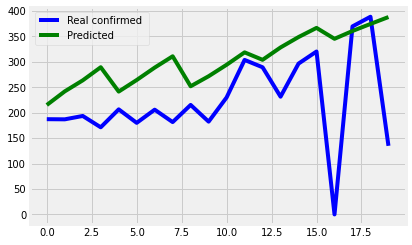

In [0]:
plt.plot(testYConfirmed,'b',label='Real confirmed ')
plt.plot(testPredict[:,1],'g',label='Predicted ')
plt.legend()
plt.show()

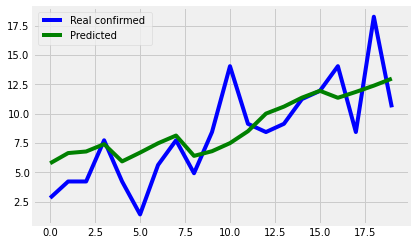

In [0]:
plt.plot(testYFatalities,'b',label='Real confirmed ')
plt.plot(testPredict[:,0],'g',label='Predicted ')
plt.legend()
plt.show()

In [0]:
from sklearn.externals import joblib
X_test=X_testB
y_test=y_testB
scaler = joblib.load("Brazil")
trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model.predict([xtest[0][:,:2].reshape(1,5,2),xtest[0][:,2:][0].reshape(1,10)])
    testPredict.append(temPredict)
testPredict=np.array(testPredict)
valPredict = model6b.predict(X_val)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
Valpredict = scaler.inverse_transform(valPredict)
ValY = scaler.inverse_transform(y_val)

testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
b=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
   b.append(scaler.inverse_transform(i)[:,1].tolist())
testYFatalities=np.array(a).flatten()
testYConfirmed=np.array(b).flatten()

#testY = scaler.inverse_transform(y_test)
testScore = math.sqrt(mean_squared_log_error(testYConfirmed, abs(testPredict[:,1])))
print('Test Score: %.2f RMSLE' % (testScore))
testScore = math.sqrt(mean_squared_log_error(testYFatalities, abs(testPredict[:,0])))
print('Test Score: %.2f RMSLE' % (testScore))

Test Score: 0.38 RMSLE
Test Score: 0.69 RMSLE


In [0]:
from sklearn.externals import joblib
X_test=X_testIndo
y_test=y_testIndo
scaler = joblib.load("Indonesia")
trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model.predict([xtest[0][:,:2].reshape(1,5,2),xtest[0][:,2:][0].reshape(1,10)])
    testPredict.append(temPredict)
testPredict=np.array(testPredict)
valPredict = model6b.predict(X_val)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
Valpredict = scaler.inverse_transform(valPredict)
ValY = scaler.inverse_transform(y_val)

testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
b=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
   b.append(scaler.inverse_transform(i)[:,1].tolist())
testYFatalities=np.array(a).flatten()
testYConfirmed=np.array(b).flatten()

#testY = scaler.inverse_transform(y_test)
testScore = math.sqrt(mean_squared_log_error(testYConfirmed, abs(testPredict[:,1])))
print('Test Score: %.2f RMSLE' % (testScore))
testScore = math.sqrt(mean_squared_log_error(testYFatalities, abs(testPredict[:,0])))
print('Test Score: %.2f RMSLE' % (testScore))

Test Score: 0.21 RMSLE
Test Score: 0.51 RMSLE


In [0]:
from sklearn.externals import joblib
X_test=X_testIndi
y_test=y_testIndi
scaler = joblib.load("India")
trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model.predict([xtest[0][:,:2].reshape(1,5,2),xtest[0][:,2:][0].reshape(1,10)])
    testPredict.append(temPredict)
testPredict=np.array(testPredict)
valPredict = model6b.predict(X_val)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
Valpredict = scaler.inverse_transform(valPredict)
ValY = scaler.inverse_transform(y_val)

testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
b=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
   b.append(scaler.inverse_transform(i)[:,1].tolist())
testYFatalities=np.array(a).flatten()
testYConfirmed=np.array(b).flatten()

#testY = scaler.inverse_transform(y_test)
testScore = math.sqrt(mean_squared_log_error(testYConfirmed, abs(testPredict[:,1])))
print('Test Score: %.2f RMSLE' % (testScore))
testScore = math.sqrt(mean_squared_log_error(testYFatalities, abs(testPredict[:,0])))
print('Test Score: %.2f RMSLE' % (testScore))

Test Score: 0.20 RMSLE
Test Score: 0.31 RMSLE


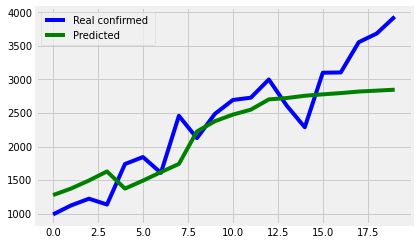

In [0]:
plt.plot(testYConfirmed,'b',label='Real confirmed ')
plt.plot(testPredict[:,1],'g',label='Predicted ')
plt.legend()
plt.show()

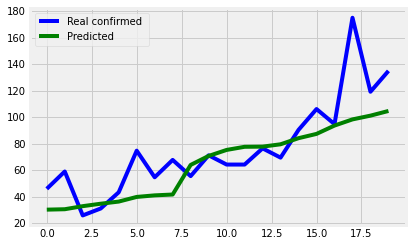

In [0]:
plt.plot(testYFatalities,'b',label='Real confirmed ')
plt.plot(testPredict[:,0],'g',label='Predicted ')
plt.legend()
plt.show()

In [0]:
from sklearn.externals import joblib
X_test=X_testP
y_test=y_testP
scaler = joblib.load("Pakistan")
trainPredict = model6b.predict(X_train)
testPredict = []
n_steps=time_ahead
for i in range(X_test.shape[0]):
    temPredict = np.zeros([n_steps,12])
    for j in range(n_steps):
        if j==0:
            xtest = X_test[i,:]
        else:
            xtest = np.concatenate((X_test[i,j:],temPredict[:j]))
        xtest=xtest[-look_back:].reshape(1,look_back,12)
        temPredict[j] = model.predict([xtest[0][:,:2].reshape(1,5,2),xtest[0][:,2:][0].reshape(1,10)])
    testPredict.append(temPredict)
testPredict=np.array(testPredict)
valPredict = model6b.predict(X_val)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
Valpredict = scaler.inverse_transform(valPredict)
ValY = scaler.inverse_transform(y_val)

testPredict = scaler.inverse_transform(testPredict.reshape(-1, 12))
a=[]
b=[]
for i in y_test:
 if i.shape[0]!=0:
   a.append(scaler.inverse_transform(i)[:,0].tolist())
   b.append(scaler.inverse_transform(i)[:,1].tolist())
testYFatalities=np.array(a).flatten()
testYConfirmed=np.array(b).flatten()

#testY = scaler.inverse_transform(y_test)
testScore = math.sqrt(mean_squared_log_error(testYConfirmed, abs(testPredict[:,1])))
print('Test Score: %.2f RMSLE' % (testScore))
testScore = math.sqrt(mean_squared_log_error(testYFatalities, abs(testPredict[:,0])))
print('Test Score: %.2f RMSLE' % (testScore))

Test Score: 0.66 RMSLE
Test Score: 0.59 RMSLE


Test Score: 0.60 RMSLE


In [0]:
testYConfirmed

array([286.41756757, 369.24864865, 320.35810811, 288.84189189,
       304.6       , 288.43783784, 291.26621622, 287.22567568,
       370.86486486, 484.        , 347.02567568, 474.3027027 ,
       303.38783784, 284.3972973 , 258.53783784, 368.03648649,
       368.44054054, 364.80405405, 315.91351351, 373.69324324])

In [0]:
testPredict[:,1]

array([258.22199993, 262.17103654, 275.02273834, 284.27991009,
       320.84155929, 337.1950109 , 346.02782804, 352.55546808,
       310.96595365, 319.89901835, 330.30322716, 344.6764909 ,
       397.13542521, 389.53525209, 387.82072473, 387.08988881,
       332.54511908, 343.73412818, 352.85649592, 360.85438007])

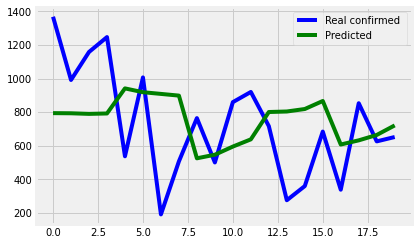

In [0]:
plt.plot(testYConfirmed,'b',label='Real confirmed ')
plt.plot(testPredict[:,1],'g',label='Predicted ')
plt.legend()
plt.show()

Final Model Using All countries with Two branches 